In [1]:
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import matplotlib
from matplotlib import cm
import networkx as nx
import powerlaw
import pandas as pd
import itertools
import seaborn as sns

In [2]:
print('np:', np.__version__)
print('pd:', pd.__version__)
print('nx:', nx.__version__)
print('matplotlib:', matplotlib.__version__)
print('seaborn:', sns.__version__)
print('powerlaw:', powerlaw.__version__)

np: 1.26.4
pd: 2.1.4
nx: 3.1
matplotlib: 3.8.0
seaborn: 0.12.2
powerlaw: 1.5


In [3]:
from matplotlib import font_manager, rc
# 한글 폰트가 깨지지 않기 위한 세팅
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
file_lst = ['0306','0709','10','11_phy','12_phy_cm','12_phy_eqm']

# 함수 정의

In [5]:
def graph(file_name):
    '''
    개별 교과(목)의 성취기준을 묶어서 네트워크를 만듦.
    '''
    G = nx.Graph()

    f = open(f"NewPhy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        # 노드 i 추가
        for i in data_line:
            if G.has_node(i):
                continue
            else:
                G.add_node(i)
        # 에지 ij와 그의 weight 추가
        for idx, i in enumerate(data_line):
            for jdx, j in enumerate(data_line):
                if idx >= jdx:
                    continue
                if G.has_edge(i, j):
                    G[i][j]['weight'] += 1
                else:
                    G.add_edge(i, j, weight=1)
    # 노드 i의 노드 강도 추가
    f = open(f"NewPhy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        for i in data_line:
            sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
            G.nodes[i]['weight'] = sum_weight
    
    return G

In [34]:
def subject_graph(itr, seed, k, file_name):
    '''
    개별 교과(목)의 성취기준을 묶어서 네트워크를 만들고, 노드와 에지에 대한 정보를 시각적으로 표시.
    단, 함수 fruchterman_reingold_layout를 활용하여, 그림이 무작위하게 나오지 않게 방지.
    itr, seed, k 변수는 해당 함수의 파라미터를 의미하고 다음과 같다:
    - itr = Number of iterations of spring-force relaxation
    - seed = Seed number
    - k = Optimal distance between nodes.
    '''
    G = nx.Graph()

    f = open(f"NewPhy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        # 노드 i 추가
        for i in data_line:
            if G.has_node(i):
                continue
            else:
                G.add_node(i)
        # 에지 ij와 그의 weight 추가
        for idx, i in enumerate(data_line):
            for jdx, j in enumerate(data_line):
                if idx >= jdx:
                    continue
                if G.has_edge(i, j):
                    G[i][j]['weight'] += 1
                else:
                    G.add_edge(i, j, weight=1)
    # 노드 i의 노드 강도 추가
    f = open(f"NewPhy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        for i in data_line:
            sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
            G.nodes[i]['weight'] = sum_weight
                    
    # 노드와 엣지의 가중치를 저장할 딕셔너리 초기화
    node_weights = {node: data['weight'] for node, data in G.nodes(data=True)}
    edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}

    # 노드의 크기 및 엣지의 굵기를 가중치에 비례하여 설정
    #node_size = [node_weights[node] * 20 for node in G.nodes()]
    edge_width = [edge_weights[edge] * 0.1 for edge in G.edges()]
    
    # 노드 색상 매핑을 위한 컬러맵 설정
    cmap = plt.get_cmap('Reds')  # viridis 컬러맵 사용
    norm = plt.Normalize(min(node_weights.values()), max(node_weights.values()))  # 노드 가중치에 따라 정규화

    # 노드 색상 설정
    node_colors = [cmap(norm(node_weights[node])) for node in G.nodes()]

    # 그래프 그리기
    pos = nx.fruchterman_reingold_layout(G, k=k, iterations=itr, weight='weight', seed=seed)  # 그래프의 노드 위치 결정
    fig, ax = plt.subplots(figsize=(6,4), dpi=300)
    nx.draw(G, pos, with_labels=True,
            node_color=node_colors, node_size=100, width=edge_width,
            font_family = font, font_size=3)
    
    # 컬러바
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label='Node strength') ##'ax=ax' 지정
    
    plt.show()

In [7]:
def entire_Graph():
    '''
    모든 교과(목)의 성취기준을 묶어서 네트워크를 만듦.
    '''
    G = nx.Graph()
    
    for file_name in file_lst:
        f = open(f"NewPhy_{file_name}.txt", 'r', encoding='UTF-8')
        for line in f:
            data_line = list(set(line.split()))
            # 노드 i 추가
            for i in data_line:
                if G.has_node(i):
                    continue
                else:
                    G.add_node(i)        
            # 에지 ij와 그의 weight 추가
            for idx, i in enumerate(data_line):
                for jdx, j in enumerate(data_line):
                    if idx >= jdx:
                        continue
                    if G.has_edge(i, j):
                        G[i][j]['weight'] += 1
                    else:
                        G.add_edge(i, j, weight=1)
        # 노드 i의 노드 강도 추가
        f = open(f"NewPhy_{file_name}.txt", 'r', encoding='UTF-8')
        for line in f:
            data_line = list(set(line.split()))
            for i in data_line:
                sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
                G.nodes[i]['weight'] = sum_weight
    return G

In [8]:
def basic_info(G):
    '''
    Edge degree dist, Node strength dist, Edge weight dist 값
    (여기서 node weight는 node strenght를 의미)
    '''
    hist_edges = []
    hist_nodeWeight = []
    hist_edgeWeight = []

    for i in list(G.nodes):
        hist_edges.append(G.degree[i])
        hist_nodeWeight.append(G.nodes[i]['weight'])

    for edge in list(G.edges):
        i, j = edge[0], edge[1]
        hist_edgeWeight.append(G[i][j]['weight'])

    print(f'Number of nodes: {G.number_of_nodes()}')
    print(f'Number of edges: {G.number_of_edges()}')
    
    print(f'Degree avg: {round(np.average(hist_edges), 2)}, Degree std: {round(np.std(hist_edges), 2)}')
    print(f'EdgeWeight avg: {round(np.average(hist_edgeWeight), 2)}, EdgeWeight std: {round(np.std(hist_edgeWeight), 2)}')
    print(f'NodeWeight avg: {round(np.average(hist_nodeWeight), 2)}, NodeWeight std: {round(np.std(hist_nodeWeight), 2)}')
    
    return hist_edges, hist_edgeWeight, hist_nodeWeight

In [9]:
def hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight):
    '''
    Edge degree dist, Node strength dist, Edge weight dist 그림
    (여기서 node weight는 node strenght를 의미)
    '''
    plt.figure(figsize=(13,4), dpi=300)
    
    plt.subplot(1,3,1)
    plt.title('Dist. of node degree')
    plt.hist(hist_edges)
    plt.yscale('log')
    plt.xlabel('Node degree')
    
    plt.subplot(1,3,2)
    plt.title('Dist. of edge weight')
    plt.hist(hist_edgeWeight)
    plt.yscale('log')
    plt.xlabel('Edge weight')

    plt.subplot(1,3,3)
    plt.title('Dist. of node strength')
    plt.hist(hist_nodeWeight)
    plt.yscale('log')
    plt.xlabel('Node strength')

In [10]:
def power_plot(hist_edges, hist_edgeWeight, hist_nodeWeight):
    '''
    분포가 멱급수 분포를 따르는지 확인.
    '''
    # Dist. of degree
    fit = powerlaw.Fit(hist_edges)
    R, p = fit.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
    if p >= 0.05:
        print(f"Dist. of degree: Pass, {fit.power_law.alpha}\n")

    # Dist. of edge weight
    fit = powerlaw.Fit(hist_edgeWeight)
    R, p = fit.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
    if p >= 0.05:
        print(f"Dist. of degree: Pass, {fit.power_law.alpha}\n")

    # Dist. of node strength
    fit = powerlaw.Fit(hist_nodeWeight)
    R, p = fit.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
    if p >= 0.05:
        print(f"Dist. of node strength: Pass, {fit.power_law.alpha}\n")

In [11]:
def info(G):
    '''
    Node degree, Node strength, Edge weight, BC 값이 큰 노드 또는 에지 나열.
    '''
    node_degree = dict(G.degree())

    # 각 엣지의 가중치(weight) 계산
    edge_weight = dict(nx.get_edge_attributes(G, 'weight'))

    # 각 노드의 강도(weight) 계산
    node_strength = dict(nx.degree(G, weight='weight'))

    # betweenness centrality 계산
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    H = G.subgraph(largest_component)
    betweenness_centrality = nx.current_flow_betweenness_centrality(H, weight='weight')

    # 결과 출력
    #print("Node Degree:")
    data = sorted(node_degree.items(), key=lambda x: x[1], reverse=True)
    df2 = pd.DataFrame(data, columns=['Node_ND','Node Degree'])

    #print("\nEdge Weight:")
    data = sorted(edge_weight.items(), key=lambda x: x[1], reverse=True)
    df3 = pd.DataFrame(data, columns=['Edge', 'Edge Weight'])

    #print("\nNode Strength:")
    data = sorted(node_strength.items(), key=lambda x: x[1], reverse=True)
    df4 = pd.DataFrame(data, columns=['Node_NS', 'Node Strength'])

    #print("\nBetweenness Centrality:")
    data = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    df5 = pd.DataFrame(data, columns=['Node_BC', 'Betweenness Centrality'])

    df = pd.concat([df2,df3,df4,df5],axis=1)
    
    return df

# 1. 물리학 용어 네트워크 

## 전체 물리학 용어 네트워크 기본 통계

In [12]:
G = entire_Graph()

In [13]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)

Number of nodes: 243
Number of edges: 852
Degree avg: 7.01, Degree std: 6.49
EdgeWeight avg: 1.14, EdgeWeight std: 0.53
NodeWeight avg: 7.98, NodeWeight std: 8.97


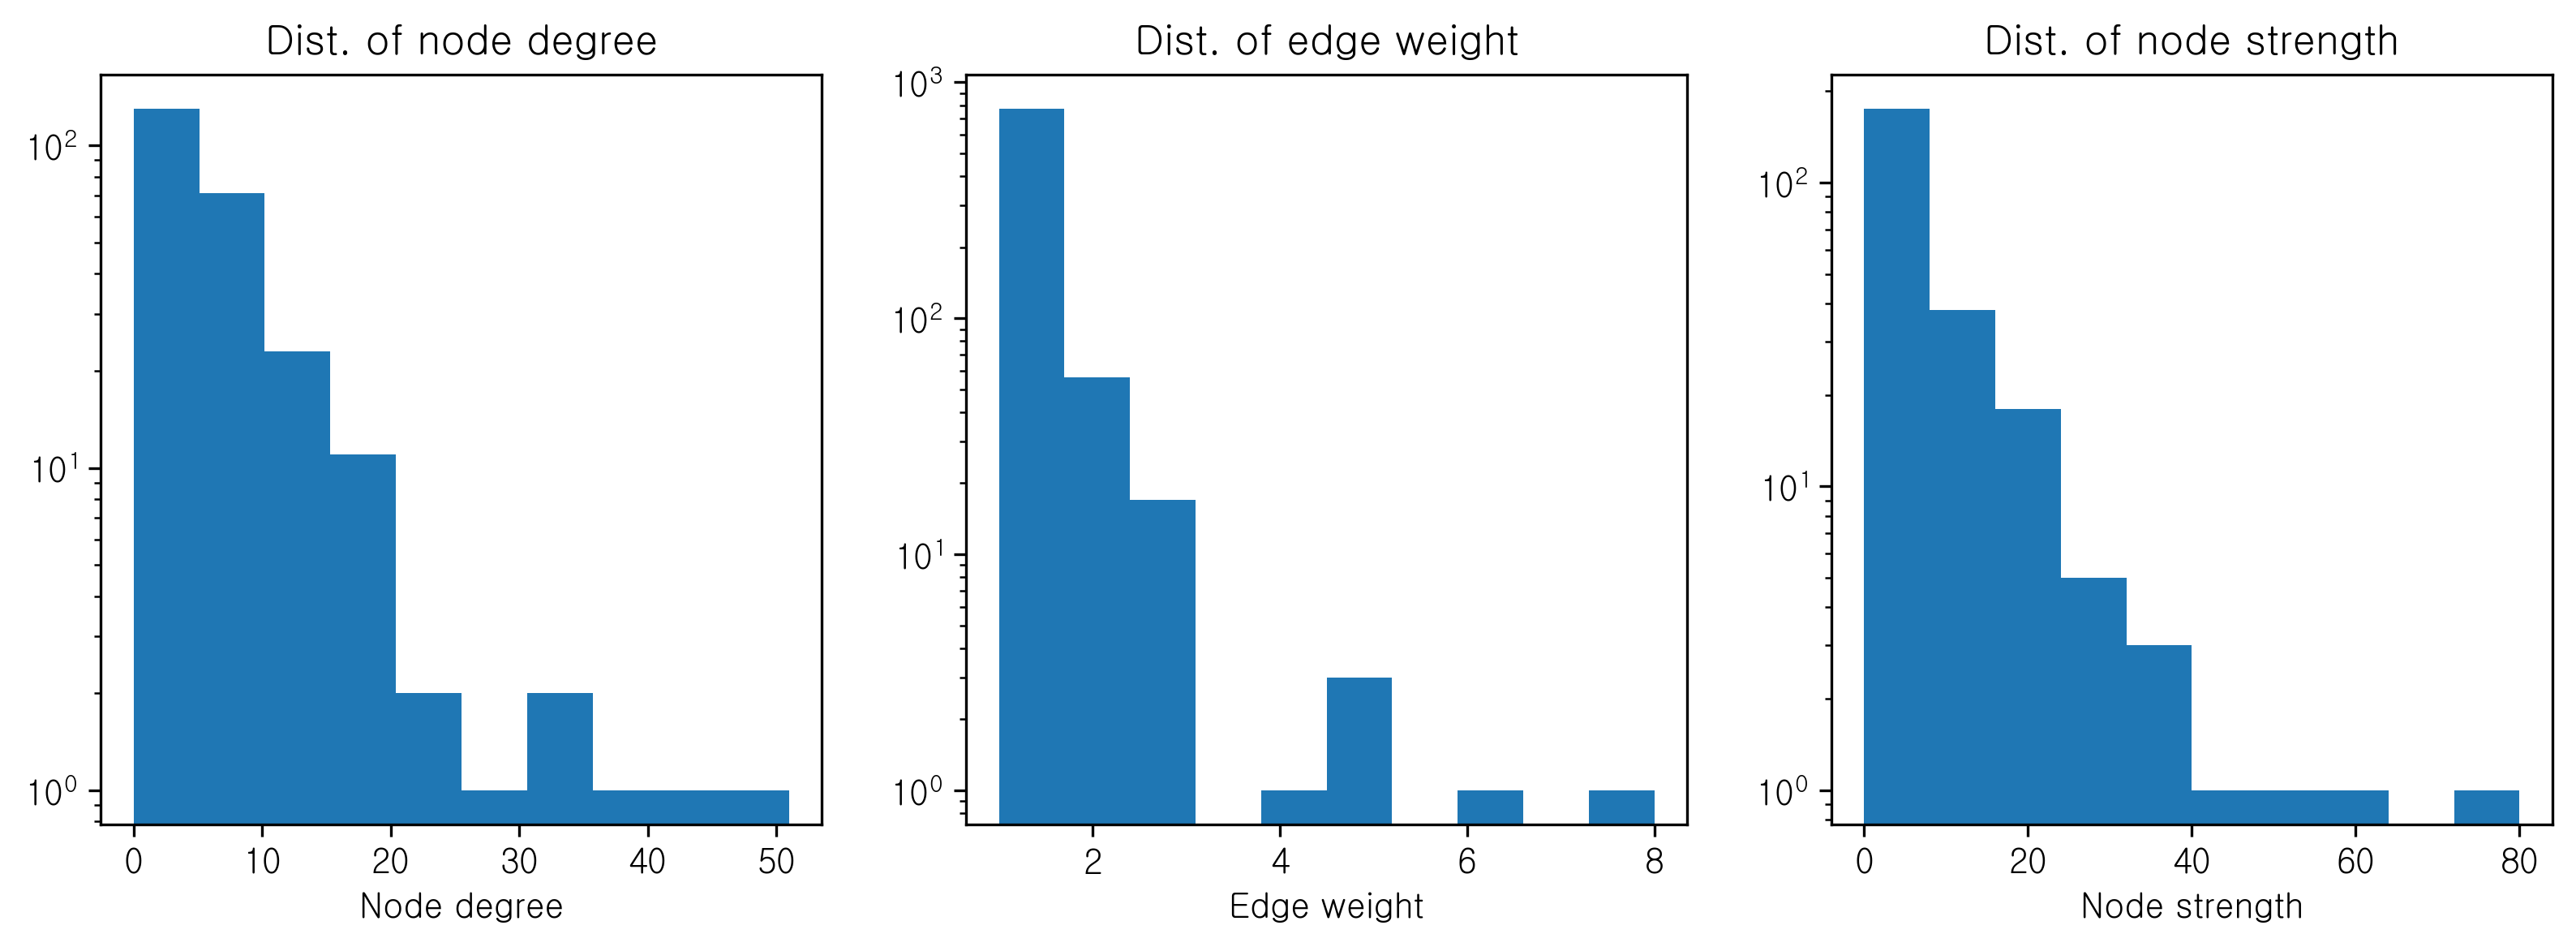

In [14]:
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [15]:
power_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

Values less than or equal to 0 in data. Throwing out 0 or negative values
C:\Users\sec\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Calculating best minimal value for power law fit
Dist. of degree: Pass, 4.0781267593571275

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Dist. of node strength: Pass, 3.453916657685464



'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


In [16]:
df = info(G)
df.head(20)

Node_ND  Node Degree       Edge  Edge Weight Node_NS  Node Strength  \
0       물체         51.0   (물체, 운동)            8      물체           80.0   
1        빛         43.0    (물체, 힘)            6       빛           56.0   
2       물질         37.0   (물체, 작용)            5      운동           48.0   
3       운동         33.0    (힘, 작용)            5      물질           47.0   
4      에너지         31.0   (물질, 상태)            5       힘           35.0   
5       전환         26.0  (에너지, 전환)            4     에너지           35.0   
6        열         23.0    (물체, 빛)            3      전환           33.0   
7        힘         21.0   (물체, 시간)            3      작용           30.0   
8       상태         20.0    (힘, 방향)            3      상태           26.0   
9       방향         20.0    (물질, 빛)            3       열           25.0   
10      지구         19.0   (기체, 부피)            3      방향           25.0   
11  역학적에너지         18.0   (기체, 압력)            3  역학적에너지           24.0   
12      작용         17.0   (작용, 평형)            3      기체           21.0   
13      중력         17.0   (작용, 운동)            3      원소           20.0   
14      형성         17.0   (부피, 온도)            3      온도           19.0   
15    상호작용         17.0   (부피, 압력)            3      중력           19.0   
16      전류         16.0    (빛, 굴절)            3    보존법칙           19.0   
17    보존법칙         16.0    (빛, 반사)            3      형성           19.0   
18      간섭         16.0   (렌즈, 거울)            3      지구           19.0   
19      기체         15.0   (운동, 중력)            3      전류           18.0   

   Node_BC  Betweenness Centrality  
0        빛                0.298037  
1       물체                0.287116  
2       물질                0.188850  
3       운동                0.148757  
4      에너지                0.146563  
5       상태                0.118867  
6       전환                0.116714  
7        열                0.113137  
8       간섭                0.092395  
9       전달                0.085750  
10       힘                0.085629  
11      지구                0.082407  
12      방향                0.081177  
13  역학적에너지                0.078189  
14      소리                0.071734  
15    상호작용                0.071201  
16      작용                0.068102  
17     반도체                0.067824  
18    스펙트럼                0.066361  
19      전기                0.063641

## Node Strength 기준 핵심 용어

In [17]:
result1 = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(file_lst[idx-1])
        file = file_lst[idx-1]
    node_strength = dict(nx.degree(G, weight='weight'))
    data = sorted(node_strength.items(), key=lambda x: x[1], reverse=True)
    df3 = pd.DataFrame(data, columns=['Node_NS', file])
    result1 = pd.concat([result1, df3], axis=1)

print('Node Strength')
result1.head(10)

Node Strength


Node_NS  Total Node_NS  0306 Node_NS  0709 Node_NS    10 Node_NS  11_phy  \
0      물체     80      물체  25.0      물체  31.0      지구  19.0       빛    14.0   
1       빛     56       힘  10.0      운동  27.0      원소  13.0      전환    11.0   
2      운동     48      물질   8.0       힘  16.0    우주초기  13.0     에너지    11.0   
3      물질     47      기체   8.0      물질  15.0      형성  13.0  역학적에너지    10.0   
4       힘     35       빛   8.0      중력  12.0      전환  12.0      작용     9.0   
5     에너지     35    전기회로   8.0      전달  11.0      물질   9.0    보존법칙     8.0   
6      전환     33      전지   8.0      입자  10.0       빛   7.0     반도체     8.0   
7      작용     30      연결   8.0      모형  10.0      천체   7.0      센서     7.0   
8      상태     26      온도   7.0    입자모형  10.0      방출   7.0       열     6.0   
9       열     25      크기   6.0      방향  10.0    스펙트럼   7.0     전위차     6.0   

  Node_NS  12_phy_cm Node_NS  12_phy_eqm  
0      물체       14.0       빛        20.0  
1      운동       13.0      확률        14.0  
2       열       13.0     디지털        11.0  
3      행성       11.0      양자        11.0  
4  역학적에너지       10.0      세기        10.0  
5       힘        9.0      방향        10.0  
6      작용        9.0     에너지        10.0  
7     운동량        7.0      간섭         9.0  
8      발사        7.0      원소         7.0  
9     우주선        7.0      생성         7.0

## Betweenness Centrality 기준 핵심 용어

In [18]:
result2 = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(file_lst[idx-1])
        file = file_lst[idx-1]
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    H = G.subgraph(largest_component)
    betweenness_centrality = nx.current_flow_betweenness_centrality(H, weight='weight')
    data = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    df5 = pd.DataFrame(data, columns=['Node_BC', file])
    result2 = pd.concat([result2, df5], axis=1)

print('Betweenness Centrality')
result2.head(10)

Betweenness Centrality


Node_BC     Total Node_BC      0306 Node_BC      0709 Node_BC        10  \
0       빛  0.298037      물체  0.788332      물체  0.456678      지구  0.713654   
1      물체  0.287116       빛  0.313468      운동  0.436328      전환  0.380366   
2      물질  0.188850      물질  0.295373      모형  0.315845      물질  0.131289   
3      운동  0.148757      기체  0.255961       힘  0.309820    우주초기  0.127176   
4     에너지  0.146563      상태  0.236754      전환  0.286417      형성  0.127176   
5      상태  0.118867      온도  0.206567      저항  0.264505      원소  0.127176   
6      전환  0.116714       물  0.166869      전류  0.258736      흐름  0.081633   
7       열  0.113137      소리  0.154425      중력  0.182138      태양  0.081633   
8      간섭  0.092395      무게  0.125433      전달  0.164606   수소핵융합  0.081633   
9      전달  0.085750       힘  0.114458      물질  0.157906      질량  0.081633   

  Node_BC    11_phy Node_BC  12_phy_cm Node_BC  12_phy_eqm  
0  역학적에너지  0.563022      물체   0.451729       빛    0.711296  
1     에너지  0.491653      운동   0.376993      간섭    0.482223  
2    보존법칙  0.490476      행성   0.352644     에너지    0.300101  
3      작용  0.341975  역학적에너지   0.316766      확률    0.268500  
4      전환  0.338539      작용   0.108096     인덕터    0.170040  
5      센서  0.286905       힘   0.108096     디지털    0.168730  
6       열  0.160886    인공위성   0.084323      양자    0.165962  
7   운동에너지  0.112698   케플러법칙   0.084323      회절    0.126181  
8   위치에너지  0.112698      중력   0.084323    홀로그램    0.126181  
9       일  0.112698   포물선운동   0.082907      파동    0.069701

## Node Strength

In [19]:
result1 = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(file_lst[idx-1])
        file = file_lst[idx-1]
    node_strength = dict(nx.degree(G, weight='weight'))
    data = sorted(node_strength.items(), key=lambda x: x[1], reverse=True)
    df3 = pd.DataFrame(data, columns=['Node_NS', file])
    result1 = pd.concat([result1, df3], axis=1)

print('Node Strength')
result1.head(10)

Node Strength


Node_NS  Total Node_NS  0306 Node_NS  0709 Node_NS    10 Node_NS  11_phy  \
0      물체     80      물체  25.0      물체  31.0      지구  19.0       빛    14.0   
1       빛     56       힘  10.0      운동  27.0      원소  13.0      전환    11.0   
2      운동     48      물질   8.0       힘  16.0    우주초기  13.0     에너지    11.0   
3      물질     47      기체   8.0      물질  15.0      형성  13.0  역학적에너지    10.0   
4       힘     35       빛   8.0      중력  12.0      전환  12.0      작용     9.0   
5     에너지     35    전기회로   8.0      전달  11.0      물질   9.0    보존법칙     8.0   
6      전환     33      전지   8.0      입자  10.0       빛   7.0     반도체     8.0   
7      작용     30      연결   8.0      모형  10.0      천체   7.0      센서     7.0   
8      상태     26      온도   7.0    입자모형  10.0      방출   7.0       열     6.0   
9       열     25      크기   6.0      방향  10.0    스펙트럼   7.0     전위차     6.0   

  Node_NS  12_phy_cm Node_NS  12_phy_eqm  
0      물체       14.0       빛        20.0  
1      운동       13.0      확률        14.0  
2       열       13.0     디지털        11.0  
3      행성       11.0      양자        11.0  
4  역학적에너지       10.0      세기        10.0  
5       힘        9.0      방향        10.0  
6      작용        9.0     에너지        10.0  
7     운동량        7.0      간섭         9.0  
8      발사        7.0      원소         7.0  
9     우주선        7.0      생성         7.0

## Betweenness Centrality (BC)

In [14]:
result2 = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(file_lst[idx-1])
        file = file_lst[idx-1]
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    H = G.subgraph(largest_component)
    betweenness_centrality = nx.current_flow_betweenness_centrality(H, weight='weight')
    data = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    df5 = pd.DataFrame(data, columns=['Node_BC', file])
    result2 = pd.concat([result2, df5], axis=1)

print('Betweenness Centrality')
result2.head(10)

Betweenness Centrality


Node_BC     Total Node_BC      0306 Node_BC      0709 Node_BC        10  \
0       빛  0.298037      물체  0.788332      물체  0.456678      지구  0.713654   
1      물체  0.287116       빛  0.313468      운동  0.436328      전환  0.380366   
2      물질  0.188850      물질  0.295373      모형  0.315845      물질  0.131289   
3      운동  0.148757      기체  0.255961       힘  0.309820      형성  0.127176   
4     에너지  0.146563      상태  0.236754      전환  0.286417    우주초기  0.127176   
5      상태  0.118867      온도  0.206567      저항  0.264505      원소  0.127176   
6      전환  0.116714       물  0.166869      전류  0.258736      흐름  0.081633   
7       열  0.113137      소리  0.154425      중력  0.182138      질량  0.081633   
8      간섭  0.092395      무게  0.125433      전달  0.164606   수소핵융합  0.081633   
9      전달  0.085750       힘  0.114458      물질  0.157906      태양  0.081633   

  Node_BC    11_phy Node_BC  12_phy_cm Node_BC  12_phy_eqm  
0  역학적에너지  0.563022      물체   0.451729       빛    0.711296  
1     에너지  0.491653      운동   0.376993      간섭    0.482223  
2    보존법칙  0.490476      행성   0.352644     에너지    0.300101  
3      작용  0.341975  역학적에너지   0.316766      확률    0.268500  
4      전환  0.338539      작용   0.108096     인덕터    0.170040  
5      센서  0.286905       힘   0.108096     디지털    0.168730  
6       열  0.160886      중력   0.084323      양자    0.165962  
7       일  0.112698    인공위성   0.084323      회절    0.126181  
8   위치에너지  0.112698   케플러법칙   0.084323    홀로그램    0.126181  
9   운동에너지  0.112698   포물선운동   0.082907      파동    0.069701

# 2. 커뮤니티 분석

## 커뮤니티 탐색

In [20]:
G = entire_Graph()

In [21]:
# Girvan-Newman 알고리즘을 사용하여 커뮤니티 탐지
comp = nx.community.greedy_modularity_communities(G, weight='weight')
communities = list(comp)

len(communities)

15

In [22]:
# 모듈도
nx.community.modularity(G, comp)

0.5999817883809871

In [23]:
# 모든 연결 성분 찾기
connected_components = list(nx.connected_components(G))

# 가장 큰 연결 성분 찾기
giant_component = max(connected_components, key=len)

# 가장 큰 연결 성분으로 구성된 서브그래프 생성
G_giant = G.subgraph(giant_component)

# Girvan-Newman 알고리즘을 사용하여 커뮤니티 탐지
comp_giant = nx.community.greedy_modularity_communities(G_giant, weight='weight')
communities_giant = list(comp_giant)

len(communities_giant) # Largest component에서의 커뮤니티 수

7

In [24]:
# 각 커뮤니티를 구성하는 노드 수
for i in communities_giant:
    print(len(i))

51
46
34
32
30
18
13


In [25]:
# 각 커뮤니티를 구성하는 단어
for i in range(7):

    lst = []
    for i in communities_giant[i]:
        lst.append(i)

    print(lst)
    print()

['탄성파', '합성', '축전기', '전기회로', '핵에너지', '열원', '질량', '빛', '센서', '전지', '전선', '병렬', '자기선속', '발전기', '자기장', '자원', '굴절', '전환', '수소핵융합', '에너지', '저항', '소비전력', '자기작용', '흐름', '코일', '영구기관', '전자기유도', '역학적에너지', '전동기', '태양', '인덕터', '변압기', '모형', '반사', '연결', '전기신호', '투과', '입력장치', '진행', '볼록렌즈', '스피커', '자기력선', '전구', '전기에너지', '경로', '전기기구', '화석연료', '전압', '보존법칙', '직렬', '전류']

['합력', '탄성력', '그래프', '직선', '이동거리', '지레', '원운동', '시간', '극', '빗면', '안정성', '뉴턴운동법칙', '운동', '도플러효과', '위치', '관성계', '돌림힘', '평형', '방향', '시간팽창', '도구', '수평', '일', '자석', '등가속도', '길이수축', '위치에너지', '마찰력', '속도', '행성', '포물선운동', '운동에너지', '알짜힘', '크기', '부력', '무게', '속력', '인공위성', '물체', '케플러법칙', '중력', '저울', '힘', '작용', '자유낙하', '공유']

['복사', '이중슬릿실험', '열전달', '음파', '양자암호통신', '보어원자모형', '관악기', '양자', '진폭', '진동수', '불확정성원리', '정상파', '전달', '확률', '대류', '중첩', '파동성', '소음', '분포', '현대원자모형', '파형', '입자파동이중성', '길이', '공간', '전도', '소리', '회절', '양자컴퓨터', '현악기', '간섭', '홀로그램', '제어', '파동', '음향']

['충돌', '운동량', '전기장', '충격량', '발사', '전기력선', '탈출속도', '광통신', '등전위면', '높낮이', '레이저', '마찰', '우주선

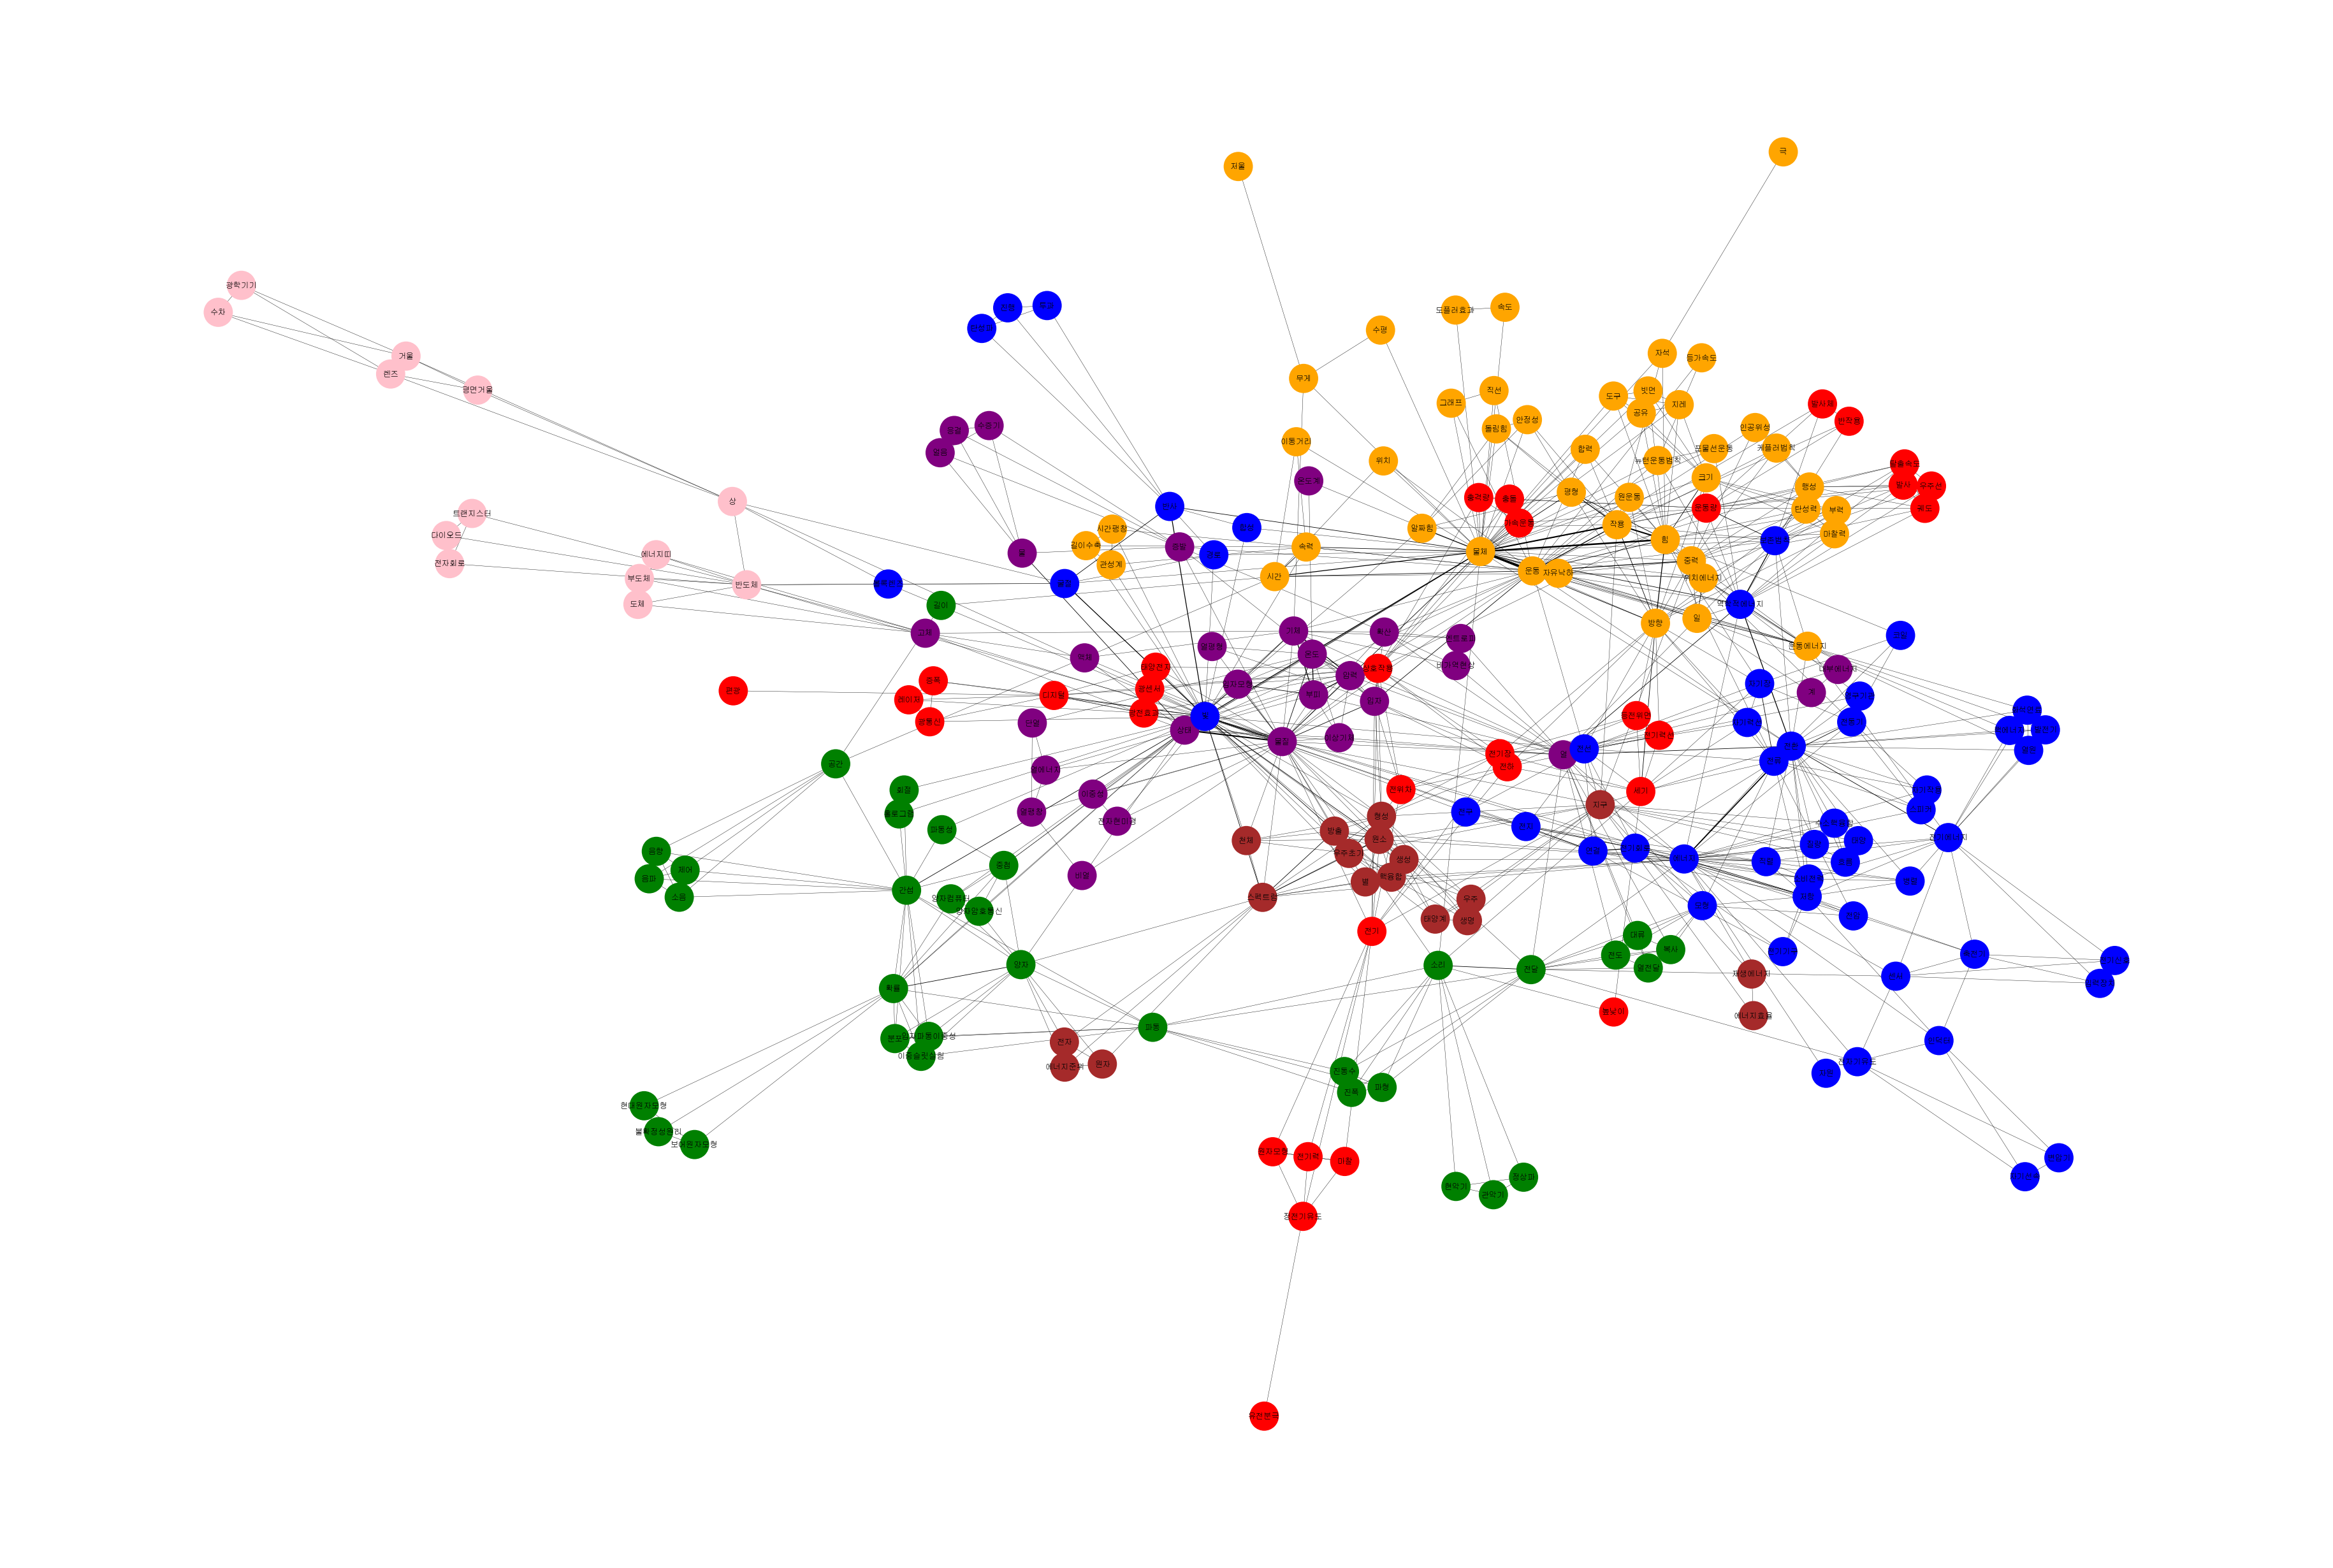

In [26]:
# 커뮤니티별로 색상 지정
colors = itertools.cycle(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])  # 필요한 색상 리스트

node_colors = {}
for community, color in zip(communities_giant, colors):
    for node in community:
        node_colors[node] = color

# 노드 색상 리스트 생성
node_color_list = [node_colors[node] for node in G_giant.nodes()]

# 그래프 레이아웃 설정
pos = nx.fruchterman_reingold_layout(G_giant, k=1, iterations=1000, weight='weight')  # 그래프의 노드 위치 결정

edge_weights = {(u, v): data['weight'] for u, v, data in G_giant.edges(data=True)}
edge_width = [edge_weights[edge] * 0.1 for edge in G_giant.edges()]

# 그래프 시각화
plt.figure(figsize=(12,8), dpi=300)
nx.draw(G_giant, pos, with_labels=True, node_color=node_color_list, width=edge_width, node_size=100, font_family = font, font_size=3)
plt.show()

## 커뮤니티 간 최단거리

In [27]:
sum_matrix = np.zeros((7,7))

for i in range(7):
    for j in range(7):
        sum_comp = []
        for x in range(len(list(communities_giant[i]))):
            for y in range(len(list(communities_giant[j]))):
                s = list(communities_giant[i])[x]
                t = list(communities_giant[j])[y]
                sum_comp.append(nx.shortest_path_length(G_giant, source=s, target=t))
        sum_matrix[i][j] = np.average(sum_comp)

lst = []
for idx, data in enumerate(sum_matrix):
    # 제외할 인덱스
    index_to_exclude = idx
    # 새로운 리스트 생성 (index_to_exclude 인덱스를 제외한 리스트)
    filtered_data = [value for i, value in enumerate(data) if i != index_to_exclude]
    print(np.average(filtered_data))
    lst.append(np.average(filtered_data))

3.3047137417204113
3.2521607632740945
3.5045989763016707
3.386801946484651
3.1835904198635974
3.0902208675492986
3.9352537233771243


Text(0, 0.5, 'Average shortest path length')

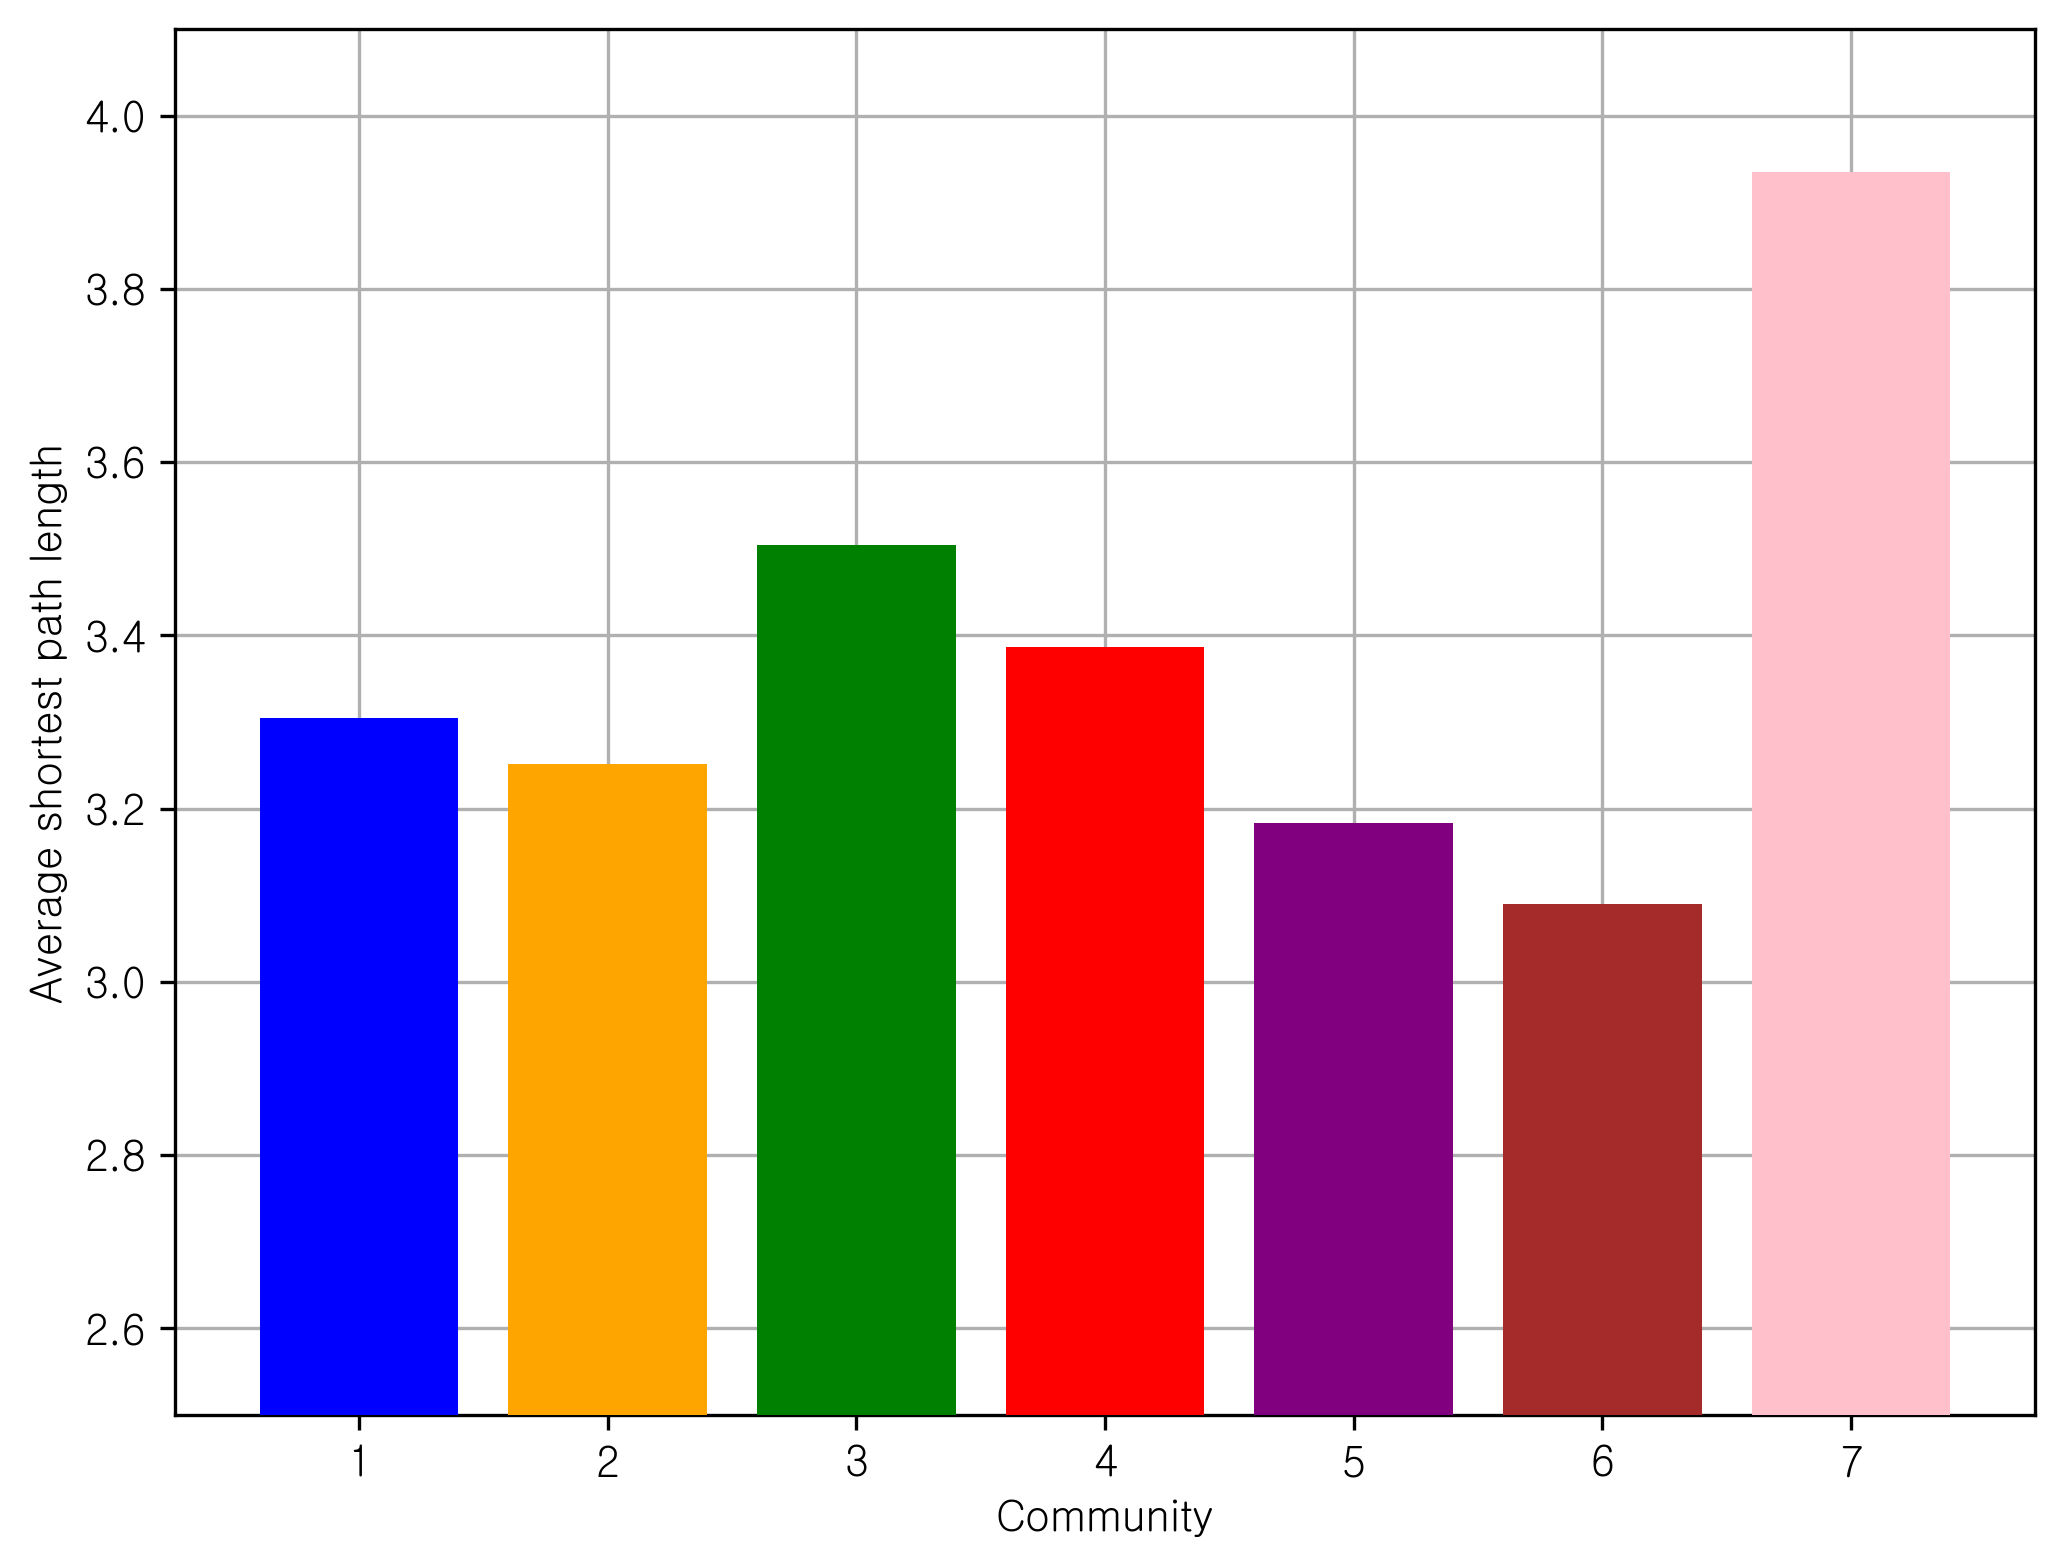

In [29]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

# 그리드를 그리기 (zorder를 낮게 설정)
ax.grid(True, zorder=0)

# 막대 그래프 그리기 (zorder를 높게 설정)
x_labels = range(1, 8)
ax.bar(x_labels, lst, color=colors, zorder=3)
ax.set_xticks(x_labels)
ax.set_ylim(2.5, 4.1)

plt.xlabel('Community')
plt.ylabel('Average shortest path length')

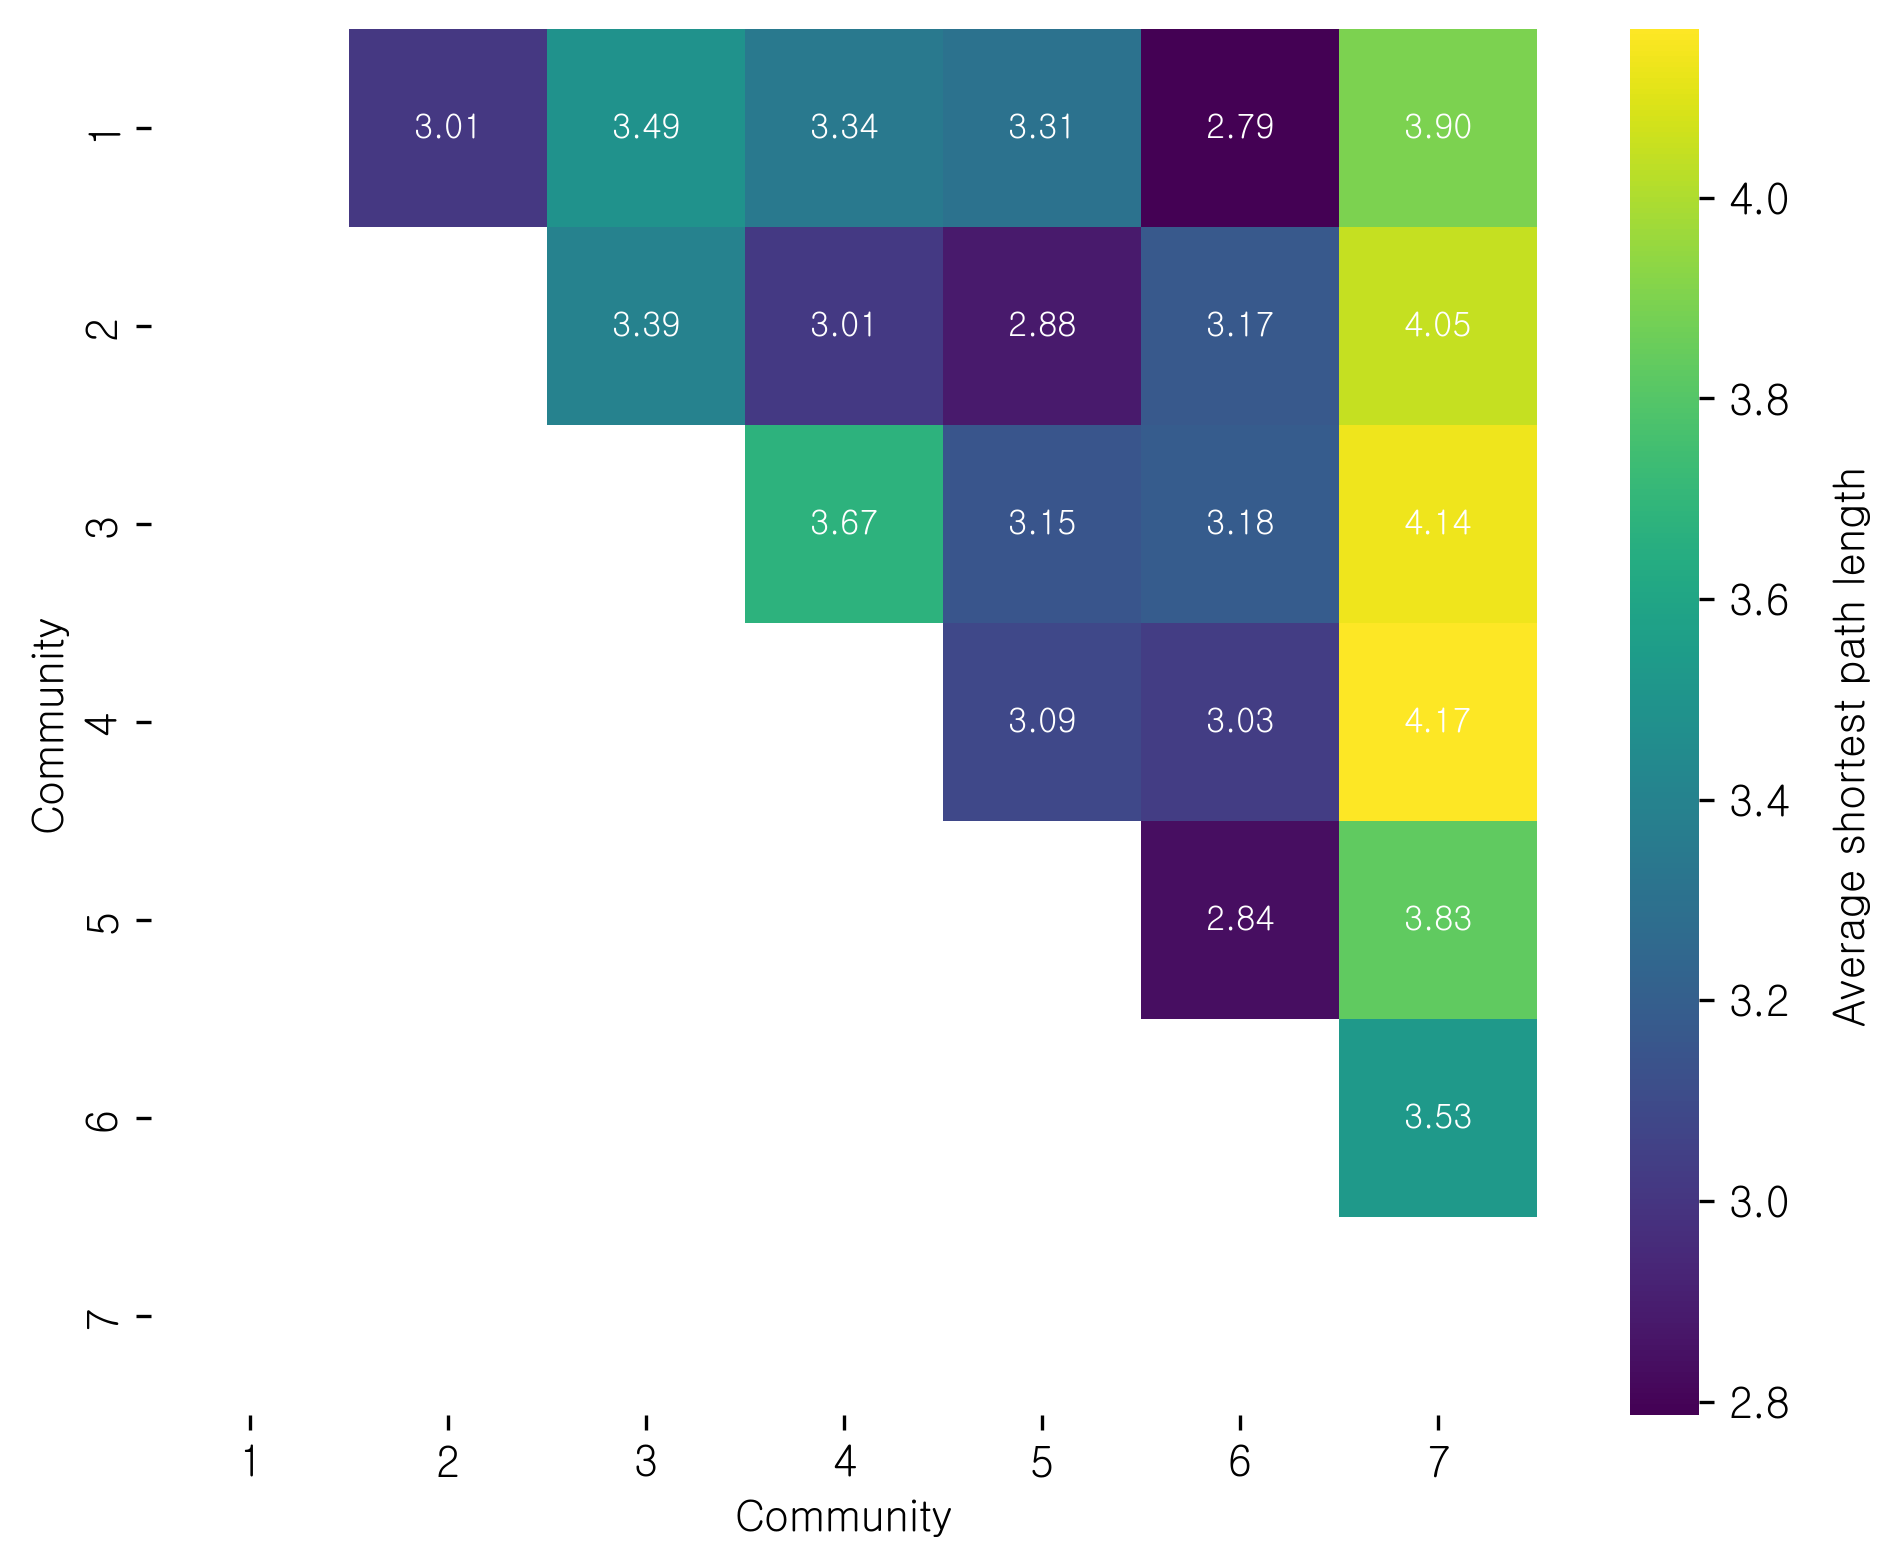

In [30]:
matrix = sum_matrix

# 좌하단 삼각형 부분만 남기고 나머지는 NaN으로 설정
mask = np.tri(*matrix.shape, k=-1).T
masked_matrix = np.where(mask, matrix, np.nan)
labels = np.arange(1, 8)

# 히트맵 그리기
plt.figure(figsize=(8, 6), dpi=300)
heatmap = sns.heatmap(masked_matrix, annot=False, fmt=".2f", cmap="viridis", cbar=True, square=True, xticklabels=labels, yticklabels=labels)

for i in range(masked_matrix.shape[0]):
    for j in range(masked_matrix.shape[1]):
        if not np.isnan(masked_matrix[i, j]):
            heatmap.text(j + 0.5, i + 0.5, f'{masked_matrix[i, j]:.2f}', 
                         ha='center', va='center', fontsize=8, color='white')

plt.xlabel('Community')
plt.ylabel('Community')

plt.text(8.5,5.0,'Average shortest path length', rotation=90)

plt.show()

# 3. 개별 교과(목) 네트워크

## 초3-6

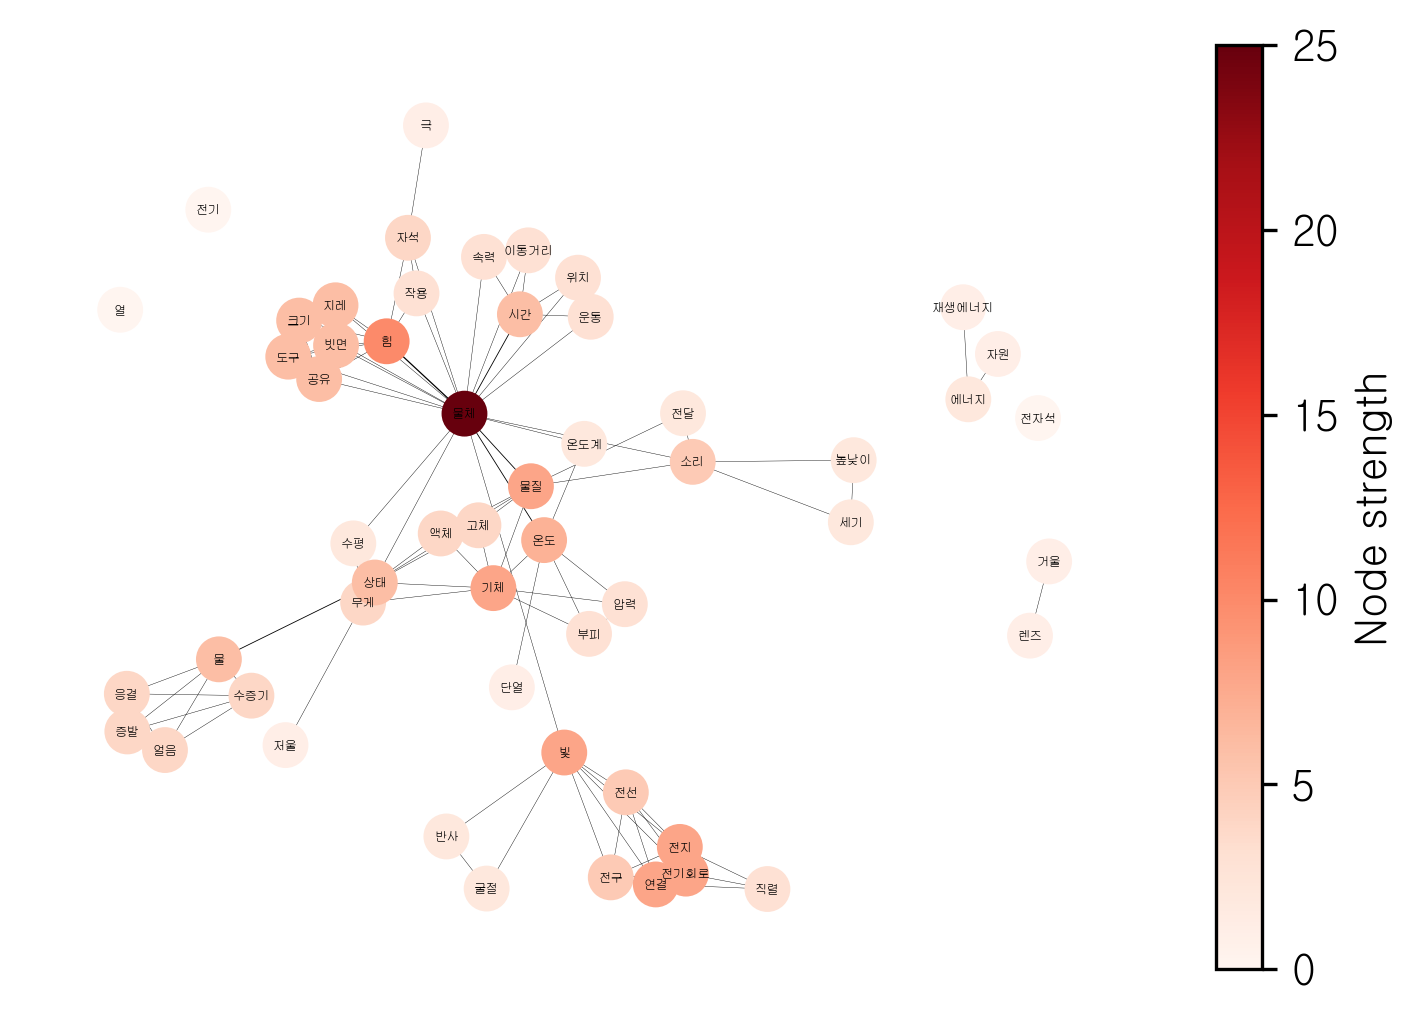

In [35]:
subject_graph(200, 1, 1.5, file_lst[0])

In [36]:
G = graph(file_lst[0])

Number of nodes: 54
Number of edges: 107
Degree avg: 3.96, Degree std: 3.06
EdgeWeight avg: 1.08, EdgeWeight std: 0.31
NodeWeight avg: 4.3, NodeWeight std: 3.76


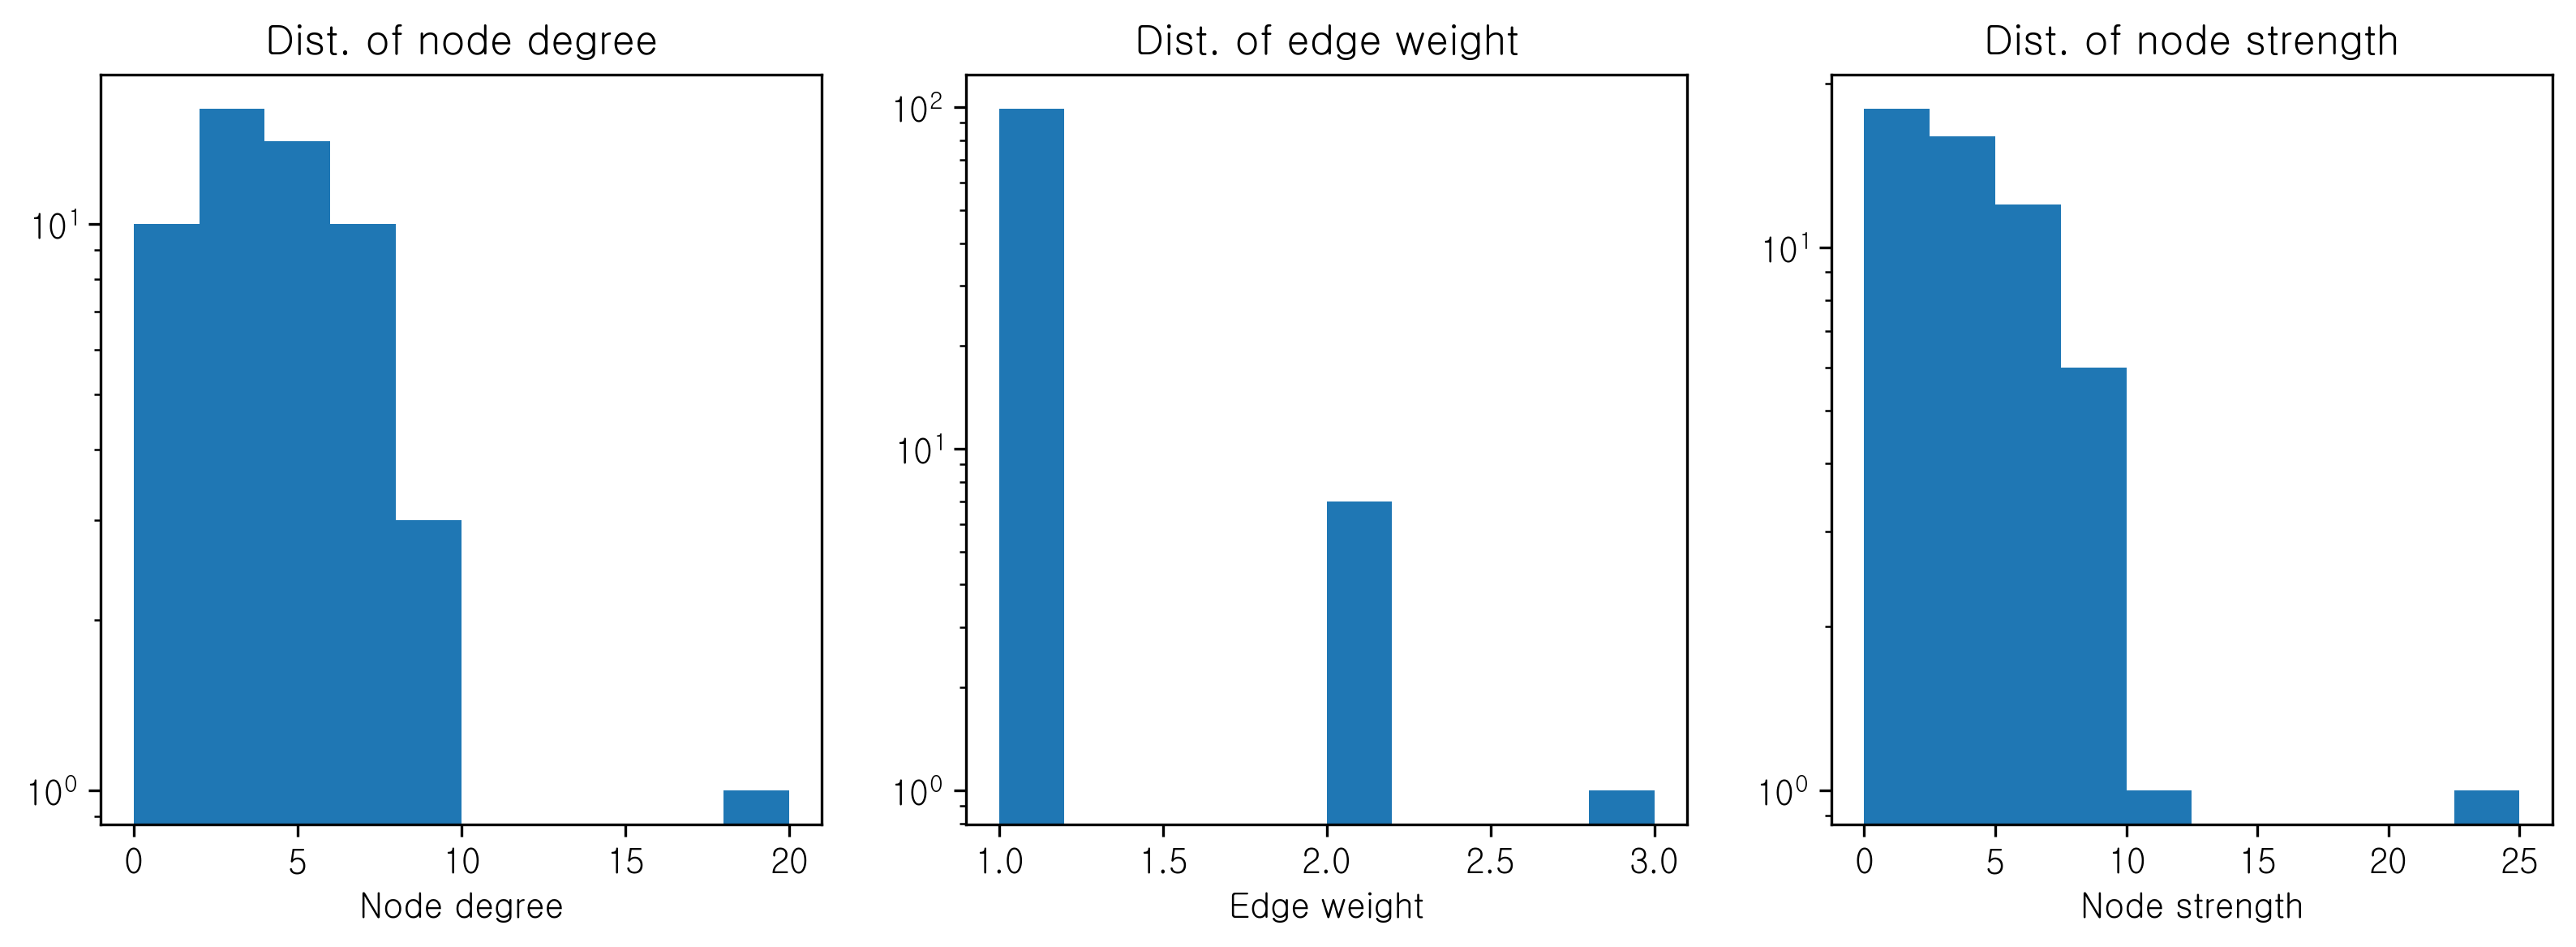

In [37]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [38]:
df = info(G)
df.head(20)

Node_ND  Node Degree        Edge  Edge Weight Node_NS  Node Strength  \
0       물체         20.0     (물체, 힘)            3      물체           25.0   
1        힘          8.0    (물체, 물질)            2       힘           10.0   
2       기체          8.0    (물체, 온도)            2      물질            8.0   
3        빛          8.0    (물체, 시간)            2      기체            8.0   
4       물질          7.0     (상태, 물)            2       빛            8.0   
5       크기          6.0  (전기회로, 전지)            2    전기회로            8.0   
6       지레          6.0  (전기회로, 연결)            2      전지            8.0   
7       도구          6.0    (전지, 연결)            2      연결            8.0   
8       빗면          6.0    (물체, 수평)            1      온도            7.0   
9       공유          6.0    (물체, 무게)            1      크기            6.0   
10      온도          6.0    (물체, 크기)            1      지레            6.0   
11    전기회로          6.0    (물체, 지레)            1      도구            6.0   
12      전지          6.0    (물체, 도구)            1      빗면            6.0   
13      연결          6.0    (물체, 빗면)            1      공유            6.0   
14      상태          5.0    (물체, 공유)            1      상태            6.0   
15      소리          5.0    (물체, 소리)            1       물            6.0   
16       물          5.0    (물체, 자석)            1      시간            6.0   
17      시간          5.0    (물체, 작용)            1      소리            5.0   
18      전구          5.0     (물체, 빛)            1      전구            5.0   
19      전선          5.0   (물체, 온도계)            1      전선            5.0   

   Node_BC  Betweenness Centrality  
0       물체                0.788332  
1        빛                0.313468  
2       물질                0.295373  
3       기체                0.255961  
4       상태                0.236754  
5       온도                0.206567  
6        물                0.166869  
7       소리                0.154425  
8       무게                0.125433  
9        힘                0.114458  
10      액체                0.074128  
11      고체                0.074128  
12      자석                0.065559  
13      시간                0.064646  
14      전지                0.048384  
15      연결                0.048384  
16    전기회로                0.048384  
17      부피                0.046448  
18      압력                0.046448  
19      수평                0.039319

## 중1-3

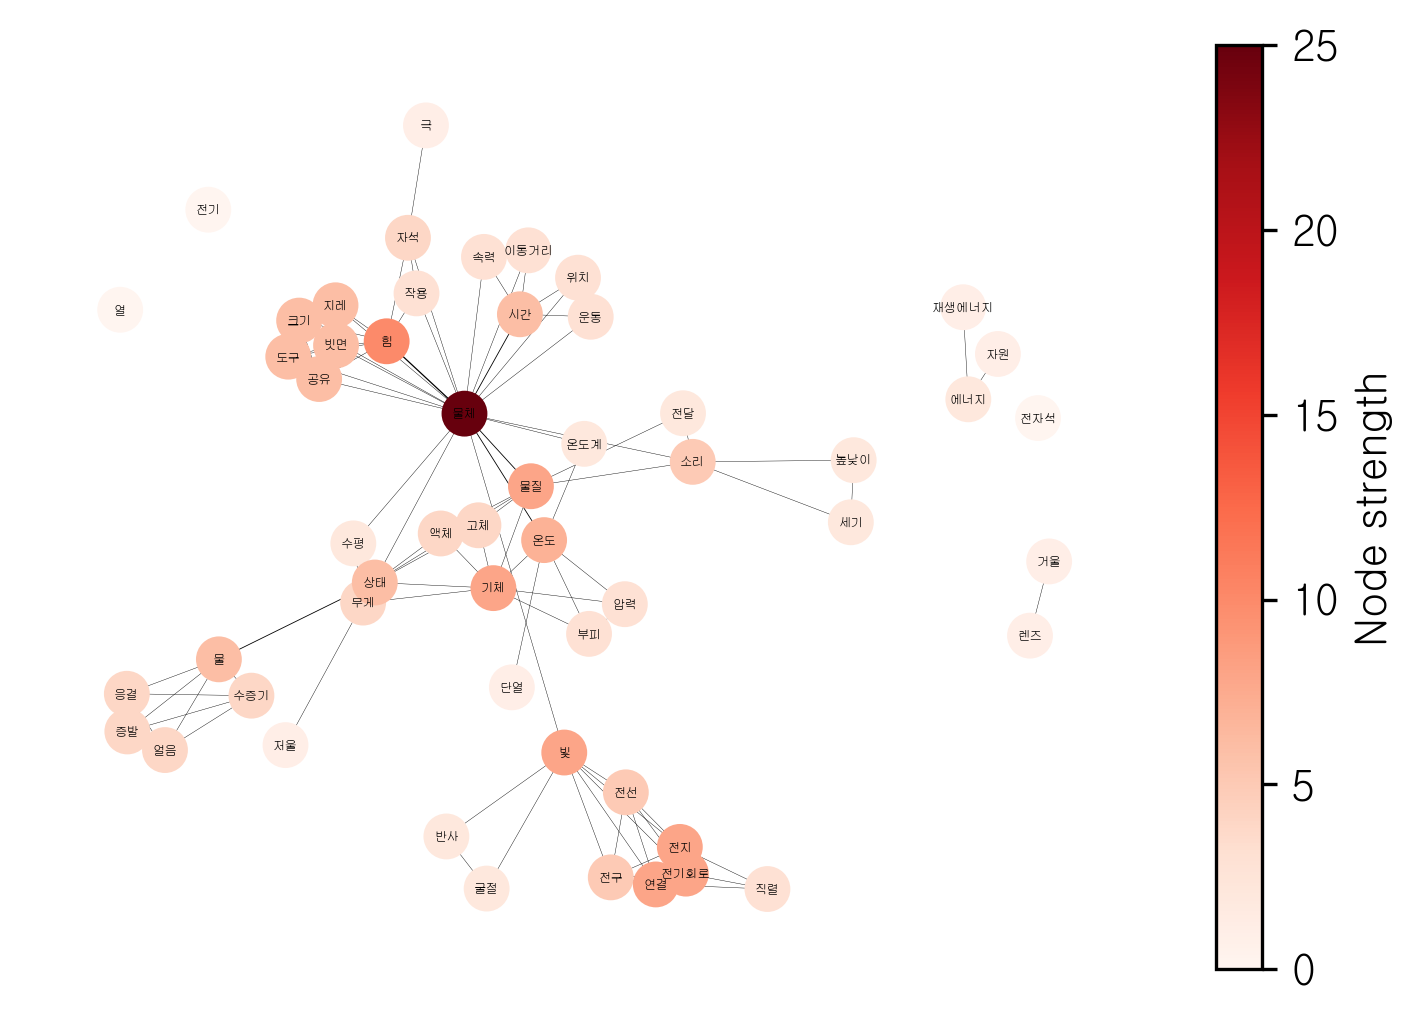

In [39]:
subject_graph(200, 1, 1.5, file_lst[0])

In [40]:
G = graph(file_lst[0])

Number of nodes: 54
Number of edges: 107
Degree avg: 3.96, Degree std: 3.06
EdgeWeight avg: 1.08, EdgeWeight std: 0.31
NodeWeight avg: 4.3, NodeWeight std: 3.76


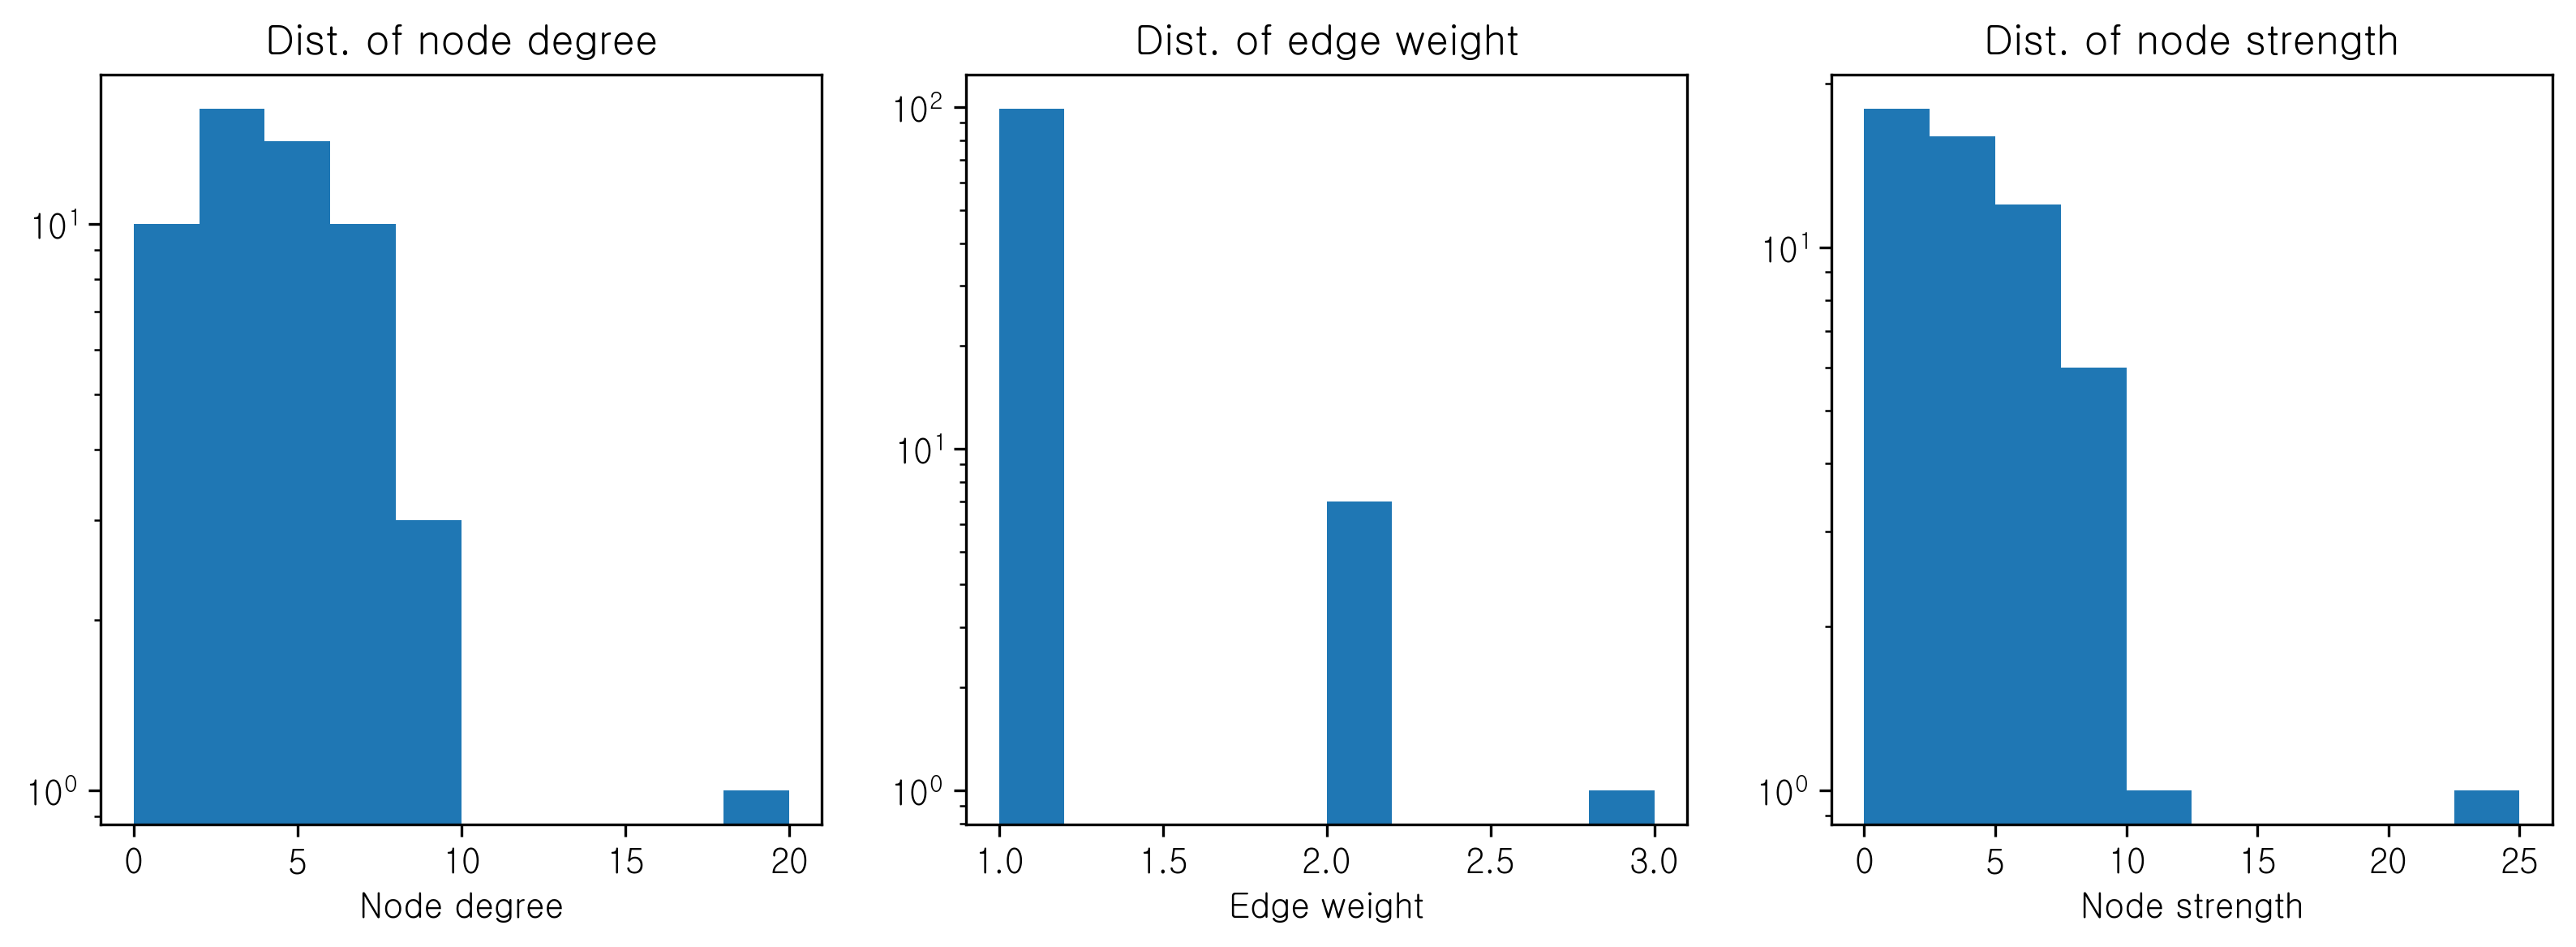

In [41]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [42]:
df = info(G)
df.head(20)

Node_ND  Node Degree        Edge  Edge Weight Node_NS  Node Strength  \
0       물체         20.0     (물체, 힘)            3      물체           25.0   
1        힘          8.0    (물체, 물질)            2       힘           10.0   
2       기체          8.0    (물체, 온도)            2      물질            8.0   
3        빛          8.0    (물체, 시간)            2      기체            8.0   
4       물질          7.0     (상태, 물)            2       빛            8.0   
5       크기          6.0  (전기회로, 전지)            2    전기회로            8.0   
6       지레          6.0  (전기회로, 연결)            2      전지            8.0   
7       도구          6.0    (전지, 연결)            2      연결            8.0   
8       빗면          6.0    (물체, 수평)            1      온도            7.0   
9       공유          6.0    (물체, 무게)            1      크기            6.0   
10      온도          6.0    (물체, 크기)            1      지레            6.0   
11    전기회로          6.0    (물체, 지레)            1      도구            6.0   
12      전지          6.0    (물체, 도구)            1      빗면            6.0   
13      연결          6.0    (물체, 빗면)            1      공유            6.0   
14      상태          5.0    (물체, 공유)            1      상태            6.0   
15      소리          5.0    (물체, 소리)            1       물            6.0   
16       물          5.0    (물체, 자석)            1      시간            6.0   
17      시간          5.0    (물체, 작용)            1      소리            5.0   
18      전구          5.0     (물체, 빛)            1      전구            5.0   
19      전선          5.0   (물체, 온도계)            1      전선            5.0   

   Node_BC  Betweenness Centrality  
0       물체                0.788332  
1        빛                0.313468  
2       물질                0.295373  
3       기체                0.255961  
4       상태                0.236754  
5       온도                0.206567  
6        물                0.166869  
7       소리                0.154425  
8       무게                0.125433  
9        힘                0.114458  
10      액체                0.074128  
11      고체                0.074128  
12      자석                0.065559  
13      시간                0.064646  
14      전지                0.048384  
15      연결                0.048384  
16    전기회로                0.048384  
17      부피                0.046448  
18      압력                0.046448  
19      수평                0.039319

## 통합과학

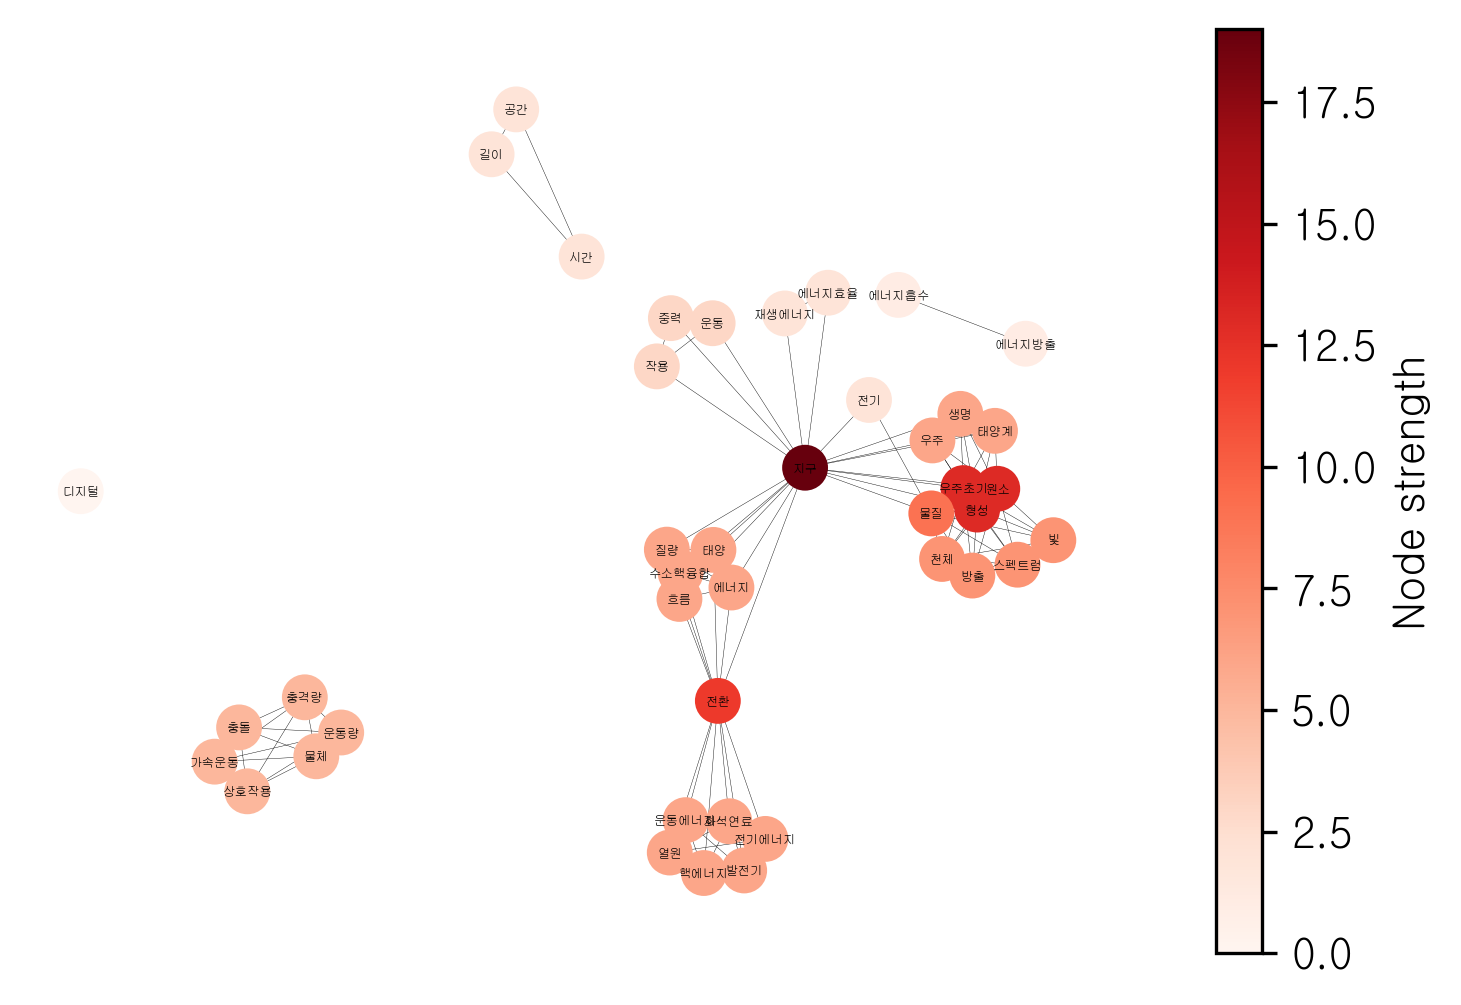

In [43]:
subject_graph(220,51, 1.5, file_lst[2])

In [44]:
G = graph(file_lst[2])

Number of nodes: 42
Number of edges: 119
Degree avg: 5.67, Degree std: 3.46
EdgeWeight avg: 1.03, EdgeWeight std: 0.16
NodeWeight avg: 5.81, NodeWeight std: 3.71


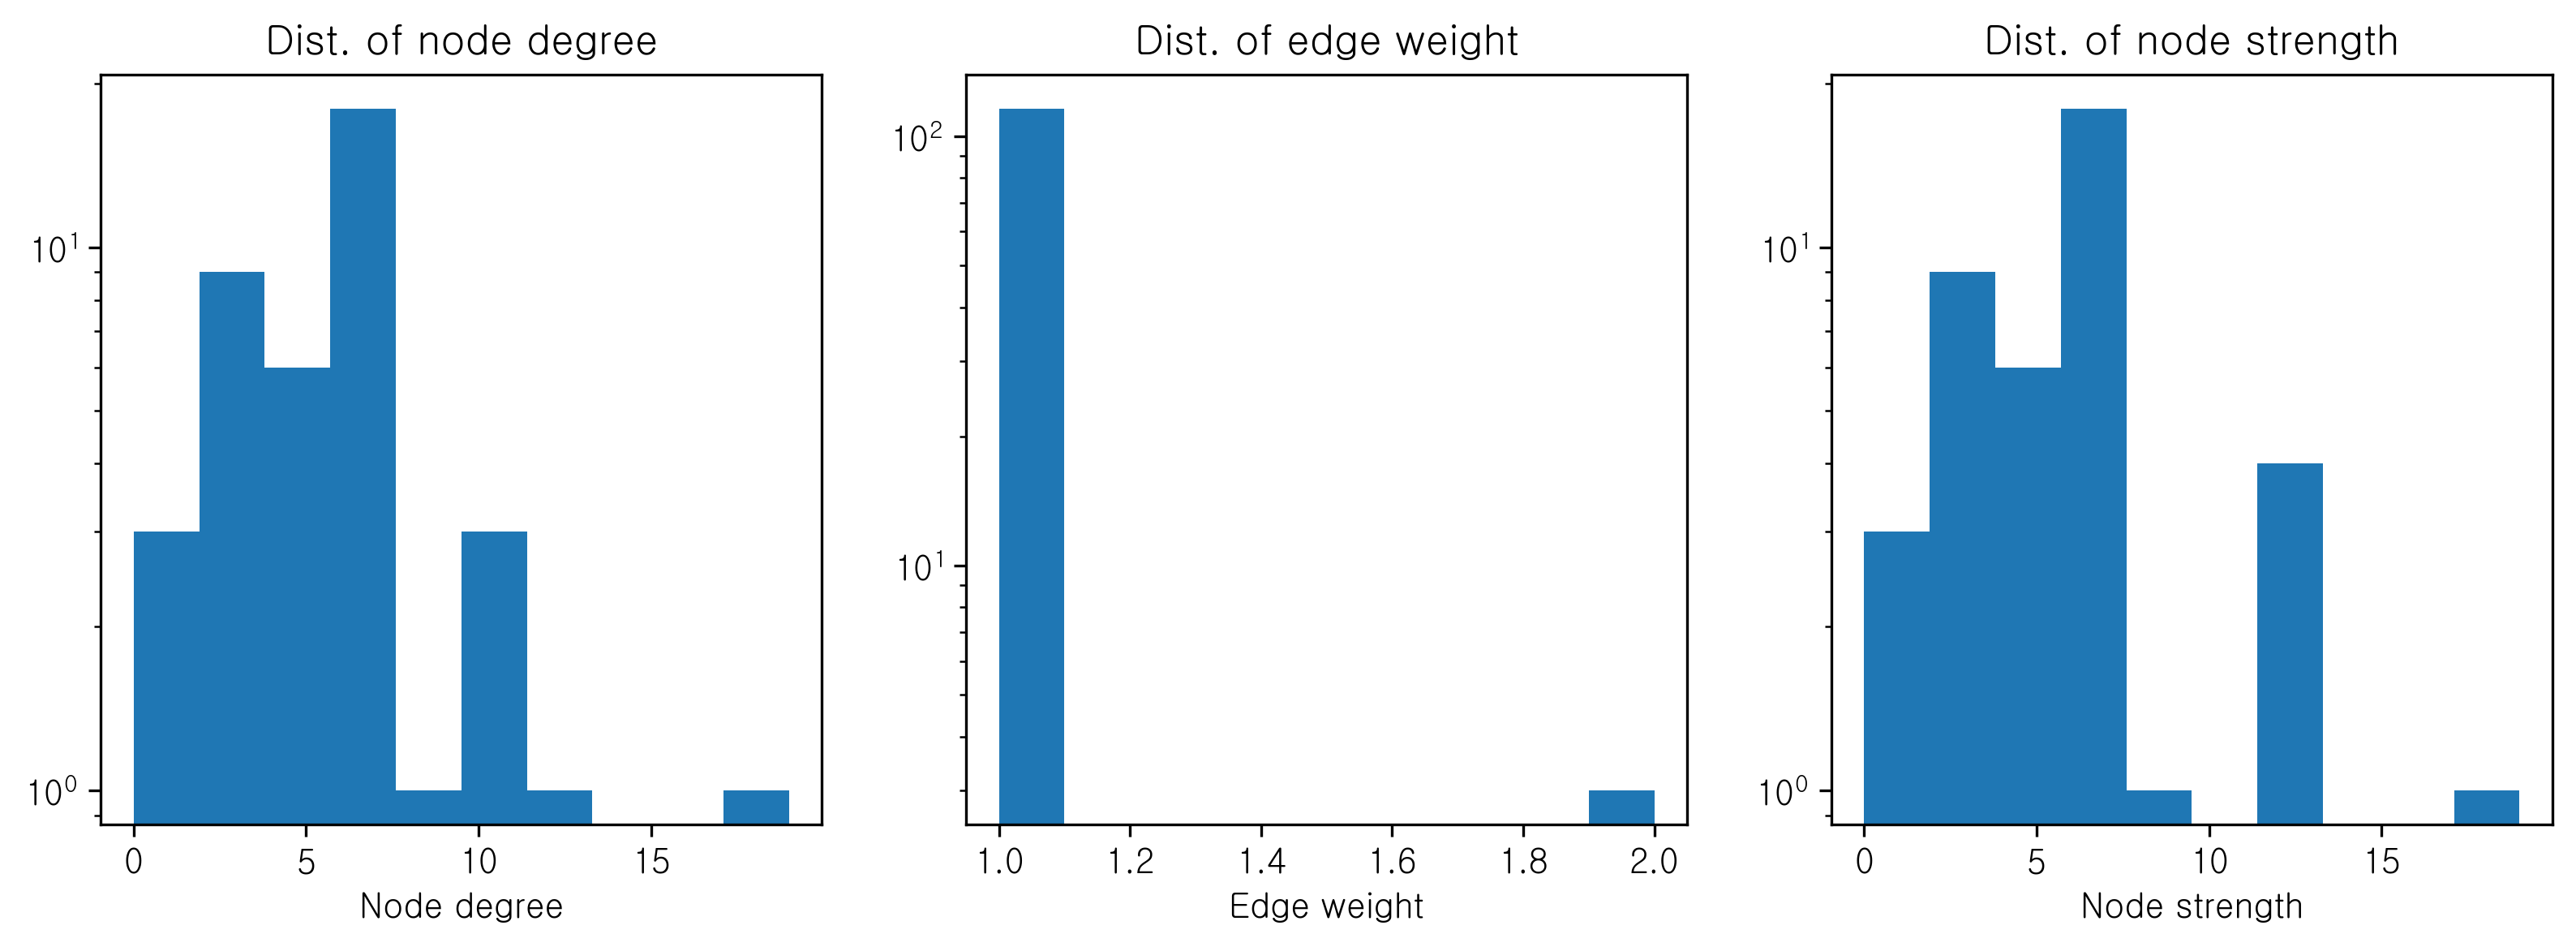

In [45]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [46]:
df = info(G)
df.head(20)

Node_ND  Node Degree          Edge  Edge Weight Node_NS  Node Strength  \
0       지구         19.0    (원소, 우주초기)            2      지구           19.0   
1       전환         12.0      (원소, 형성)            2      원소           13.0   
2       원소         11.0    (우주초기, 형성)            2    우주초기           13.0   
3     우주초기         11.0      (시간, 길이)            1      형성           13.0   
4       형성         11.0      (시간, 공간)            1      전환           12.0   
5       물질          9.0      (길이, 공간)            1      물질            9.0   
6        빛          7.0       (원소, 빛)            1       빛            7.0   
7       천체          7.0      (원소, 물질)            1      천체            7.0   
8       방출          7.0      (원소, 천체)            1      방출            7.0   
9     스펙트럼          7.0      (원소, 방출)            1    스펙트럼            7.0   
10      생명          6.0    (원소, 스펙트럼)            1      생명            6.0   
11      우주          6.0      (원소, 지구)            1      우주            6.0   
12     태양계          6.0      (원소, 생명)            1     태양계            6.0   
13     에너지          6.0      (원소, 우주)            1     에너지            6.0   
14      질량          6.0     (원소, 태양계)            1      질량            6.0   
15      흐름          6.0     (우주초기, 빛)            1      흐름            6.0   
16      태양          6.0    (우주초기, 물질)            1      태양            6.0   
17   수소핵융합          6.0    (우주초기, 천체)            1   수소핵융합            6.0   
18    핵에너지          6.0    (우주초기, 방출)            1    핵에너지            6.0   
19      열원          6.0  (우주초기, 스펙트럼)            1      열원            6.0   

   Node_BC  Betweenness Centrality  
0       지구                0.713654  
1       전환                0.380366  
2       물질                0.131289  
3     우주초기                0.127176  
4       형성                0.127176  
5       원소                0.127176  
6       흐름                0.081633  
7       태양                0.081633  
8    수소핵융합                0.081633  
9       질량                0.081633  
10     에너지                0.081633  
11     태양계                0.064276  
12      우주                0.064276  
13      생명                0.064276  
14   운동에너지                0.045742  
15      열원                0.045742  
16    핵에너지                0.045742  
17   전기에너지                0.045742  
18     발전기                0.045742  
19    화석연료                0.045742

## 물리학

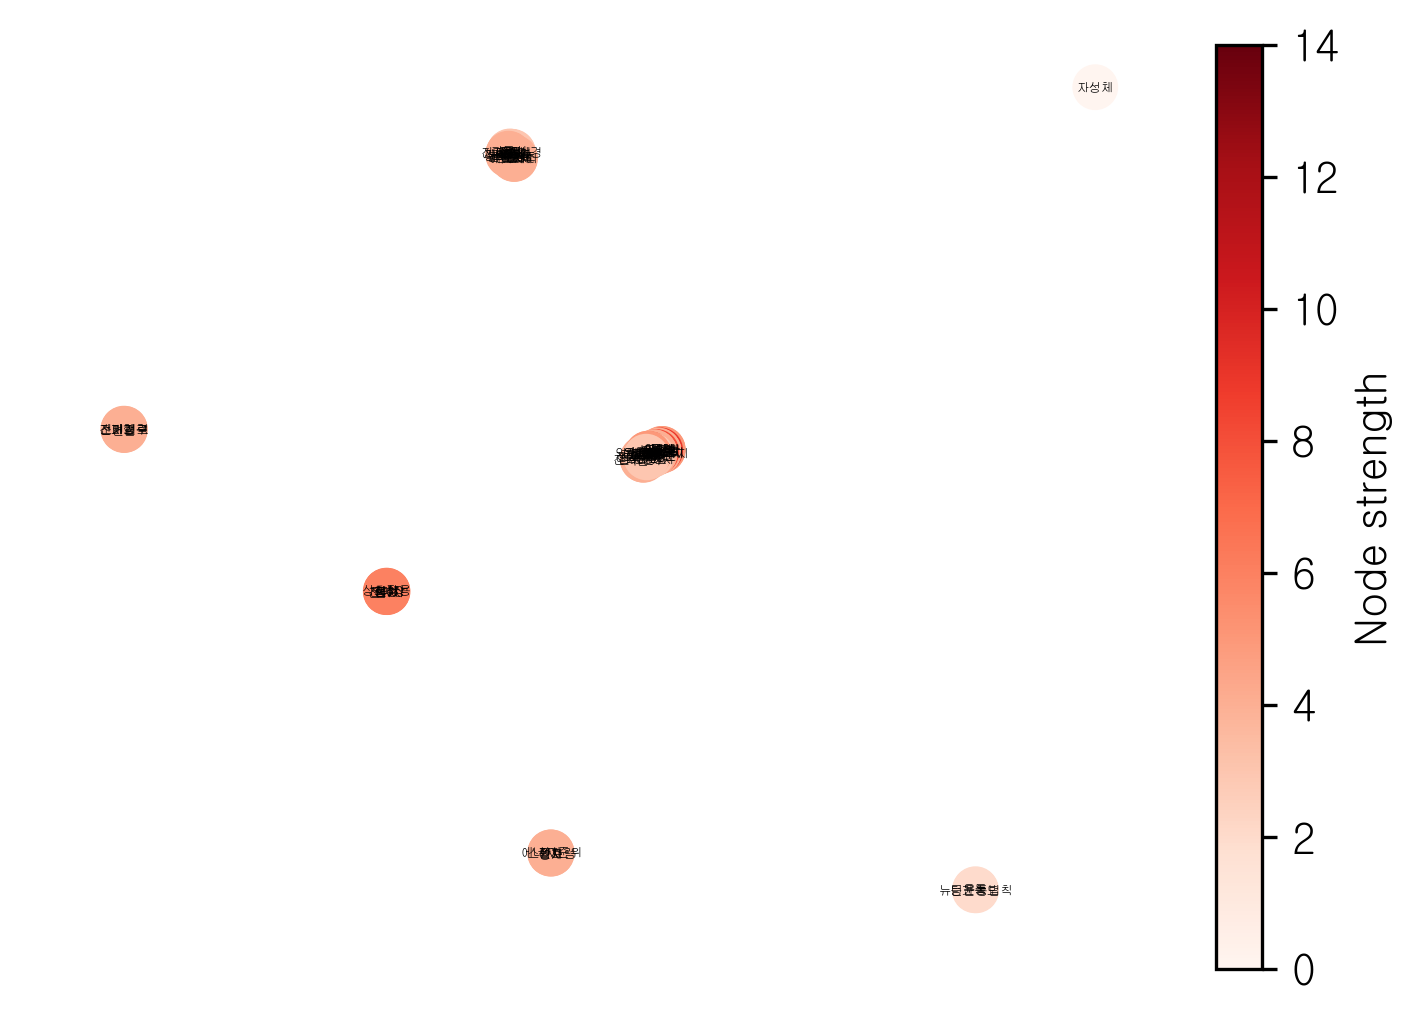

In [47]:
subject_graph(10000, 14, 1, file_lst[3])

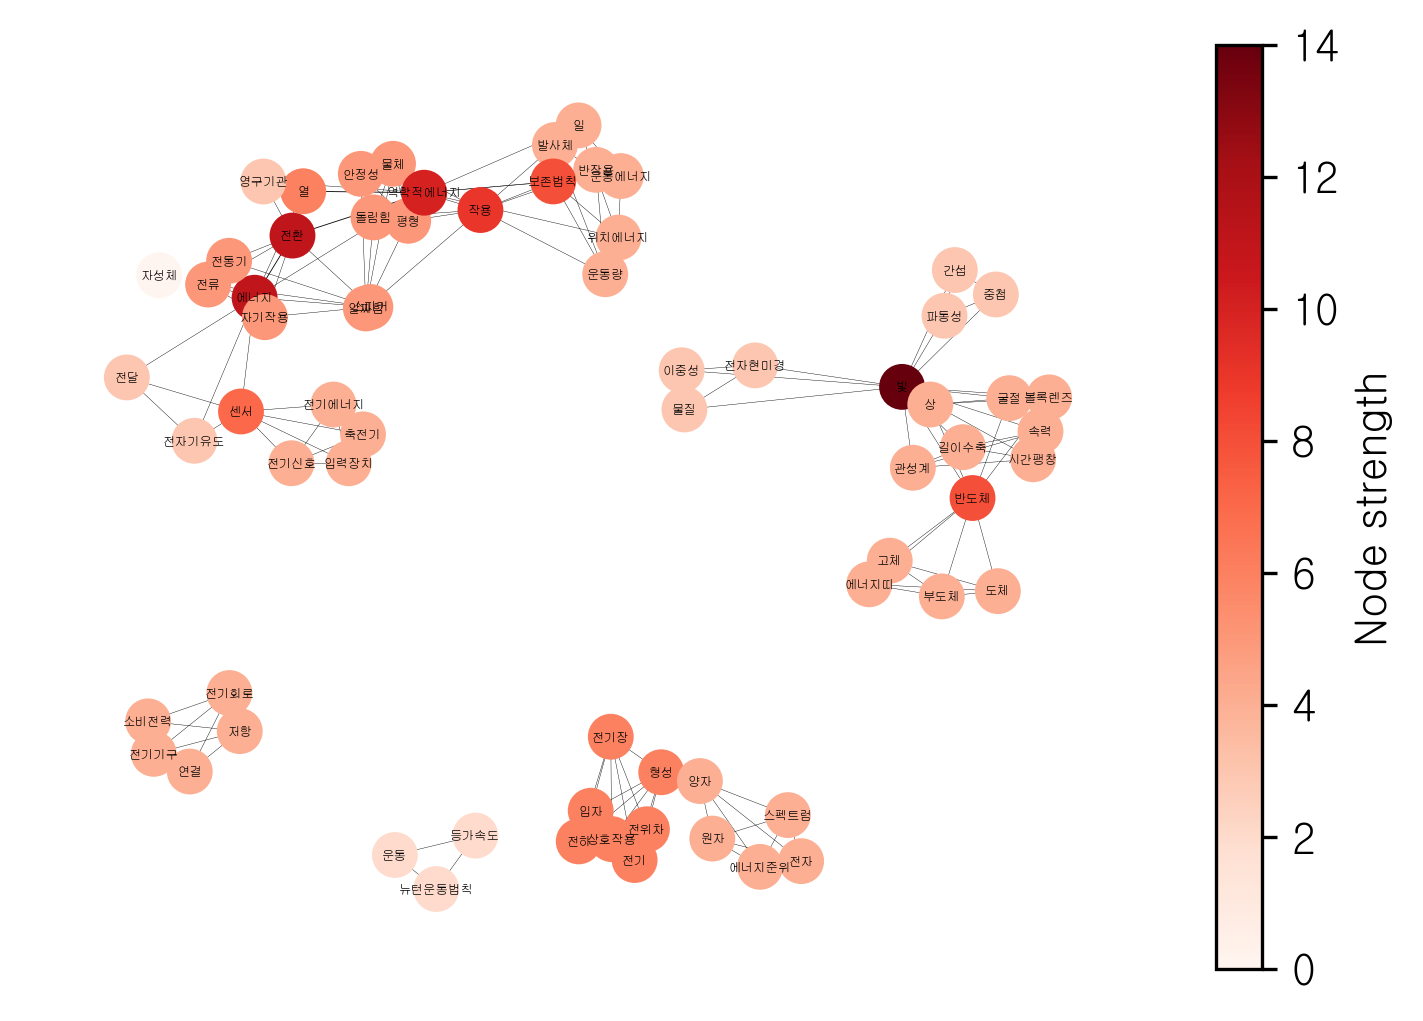

In [48]:
#(itr, seed, k, file_name)
subject_graph(220,51, 1.5, file_lst[3])

In [49]:
G = graph(file_lst[3])

Number of nodes: 69
Number of edges: 160
Degree avg: 4.64, Degree std: 2.01
EdgeWeight avg: 1.02, EdgeWeight std: 0.16
NodeWeight avg: 4.75, NodeWeight std: 2.22


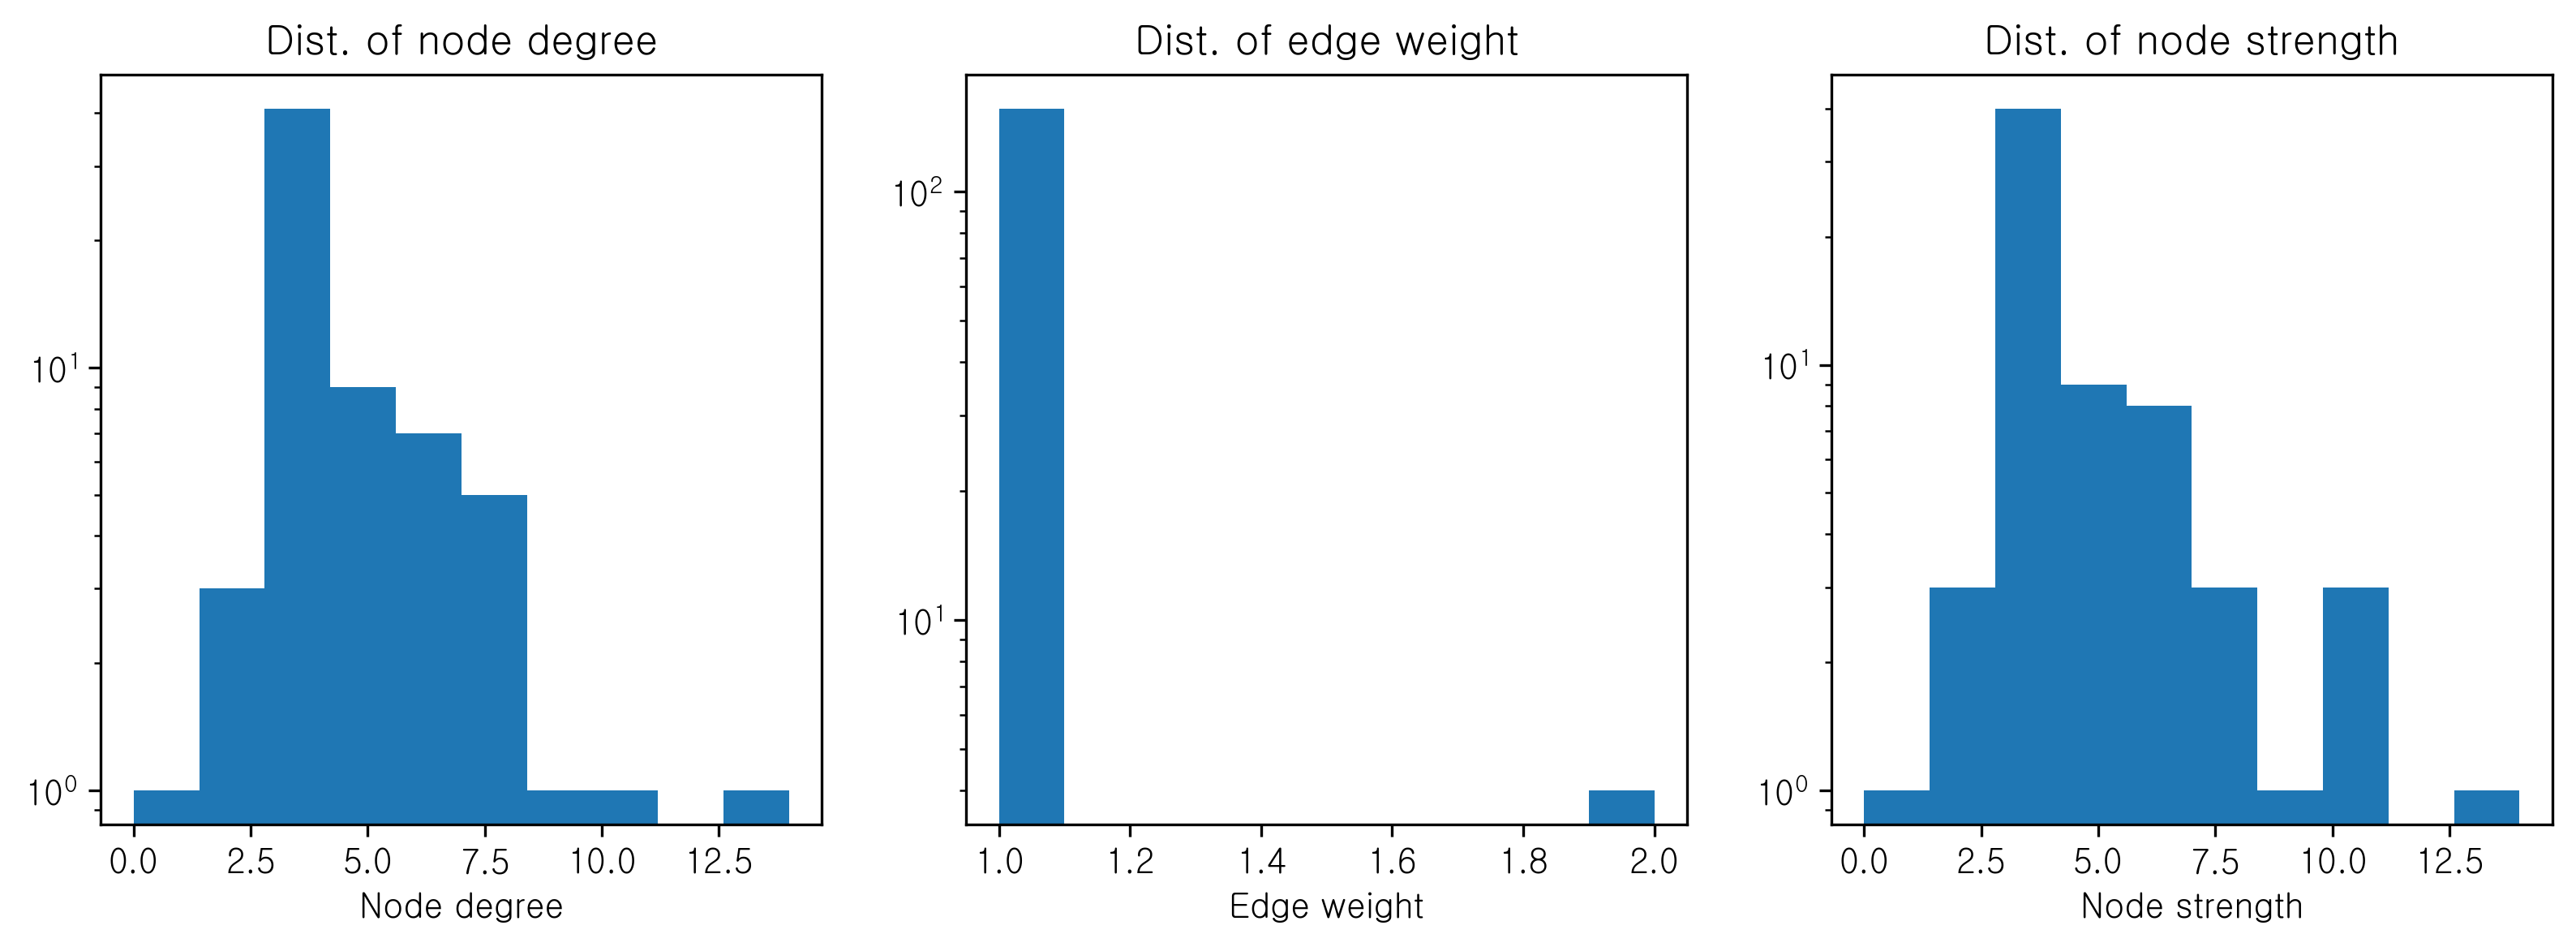

In [50]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [51]:
df = info(G)
df.head(20)

Node_ND  Node Degree          Edge  Edge Weight Node_NS  Node Strength  \
0        빛         14.0  (역학적에너지, 전환)            2       빛           14.0   
1      에너지         10.0   (역학적에너지, 열)            2      전환           11.0   
2       작용          9.0       (전환, 열)            2     에너지           11.0   
3     보존법칙          8.0     (전환, 에너지)            2  역학적에너지           10.0   
4   역학적에너지          8.0    (알짜힘, 안정성)            1      작용            9.0   
5       전환          8.0     (알짜힘, 물체)            1    보존법칙            8.0   
6      반도체          8.0    (알짜힘, 돌림힘)            1     반도체            8.0   
7       센서          7.0     (알짜힘, 평형)            1      센서            7.0   
8      전위차          6.0     (알짜힘, 작용)            1       열            6.0   
9      전기장          6.0     (안정성, 물체)            1     전위차            6.0   
10    상호작용          6.0    (안정성, 돌림힘)            1     전기장            6.0   
11      전기          6.0     (안정성, 평형)            1    상호작용            6.0   
12      전하          6.0     (안정성, 작용)            1      전기            6.0   
13      형성          6.0     (물체, 돌림힘)            1      전하            6.0   
14      입자          6.0      (물체, 평형)            1      형성            6.0   
15     알짜힘          5.0      (물체, 작용)            1      입자            6.0   
16     안정성          5.0     (돌림힘, 평형)            1     알짜힘            5.0   
17      물체          5.0     (돌림힘, 작용)            1     안정성            5.0   
18     돌림힘          5.0      (평형, 작용)            1      물체            5.0   
19      평형          5.0     (작용, 운동량)            1     돌림힘            5.0   

   Node_BC  Betweenness Centrality  
0   역학적에너지                0.563022  
1      에너지                0.491653  
2     보존법칙                0.490476  
3       작용                0.341975  
4       전환                0.338539  
5       센서                0.286905  
6        열                0.160886  
7    운동에너지                0.112698  
8    위치에너지                0.112698  
9        일                0.112698  
10     운동량                0.091534  
11     반작용                0.091534  
12     발사체                0.091534  
13      전달                0.090608  
14   전자기유도                0.090608  
15    영구기관                0.060730  
16     전동기                0.060014  
17    자기작용                0.060014  
18     스피커                0.060014  
19      전류                0.060014

## 역학과 에너지

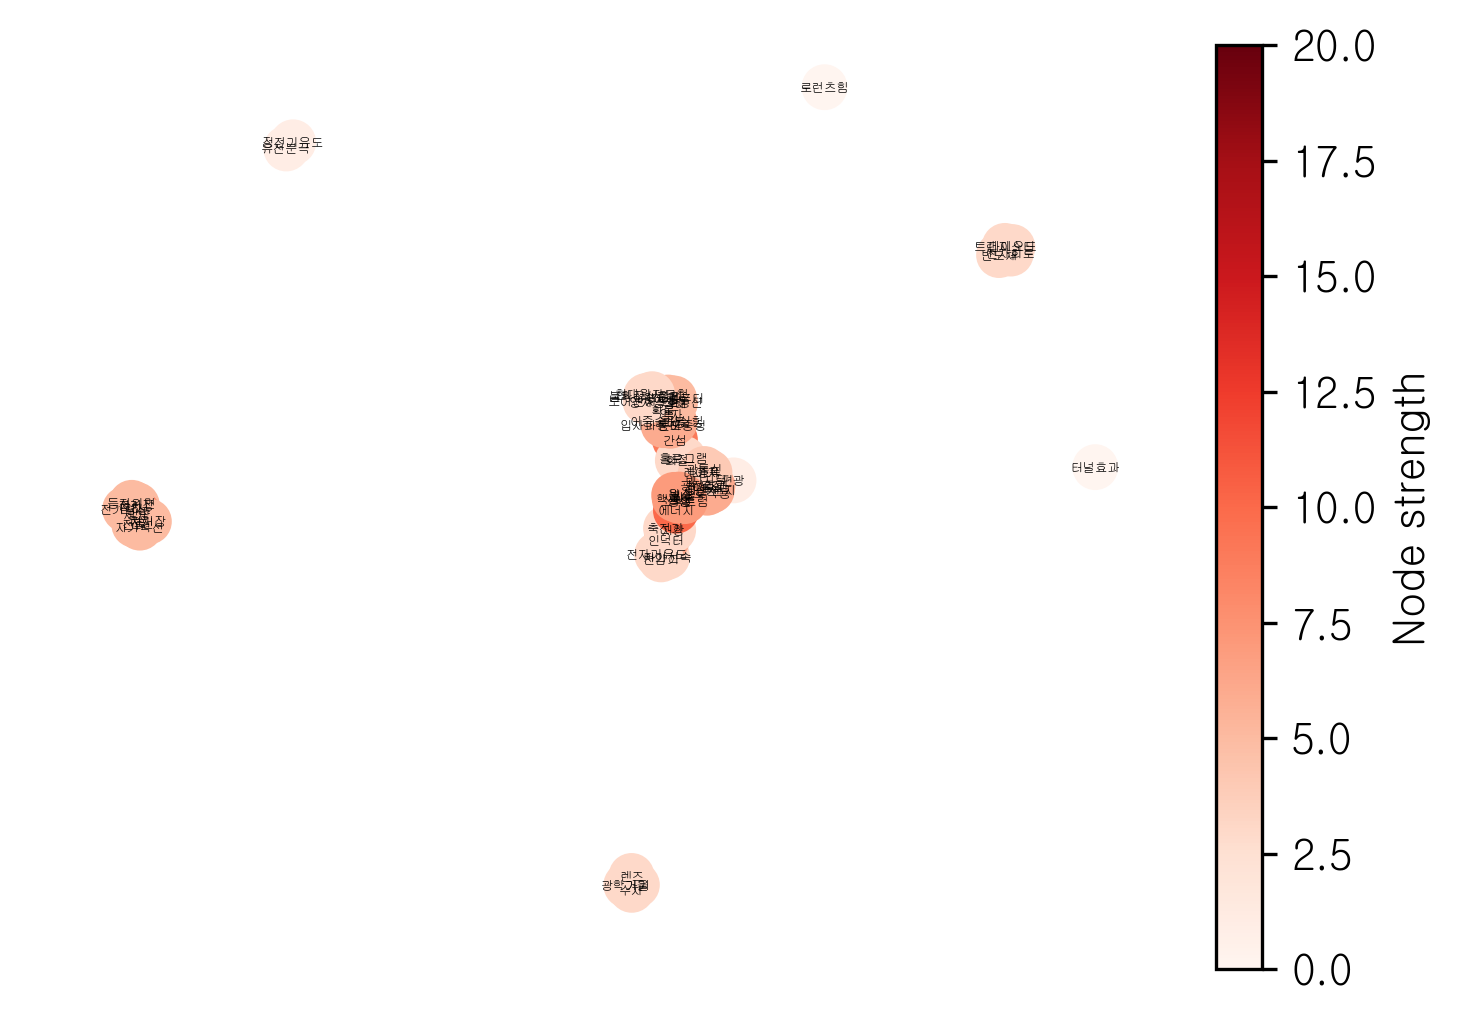

In [52]:
#(itr, seed, k, file_name)
subject_graph(1000, 1, 1, file_lst[5])

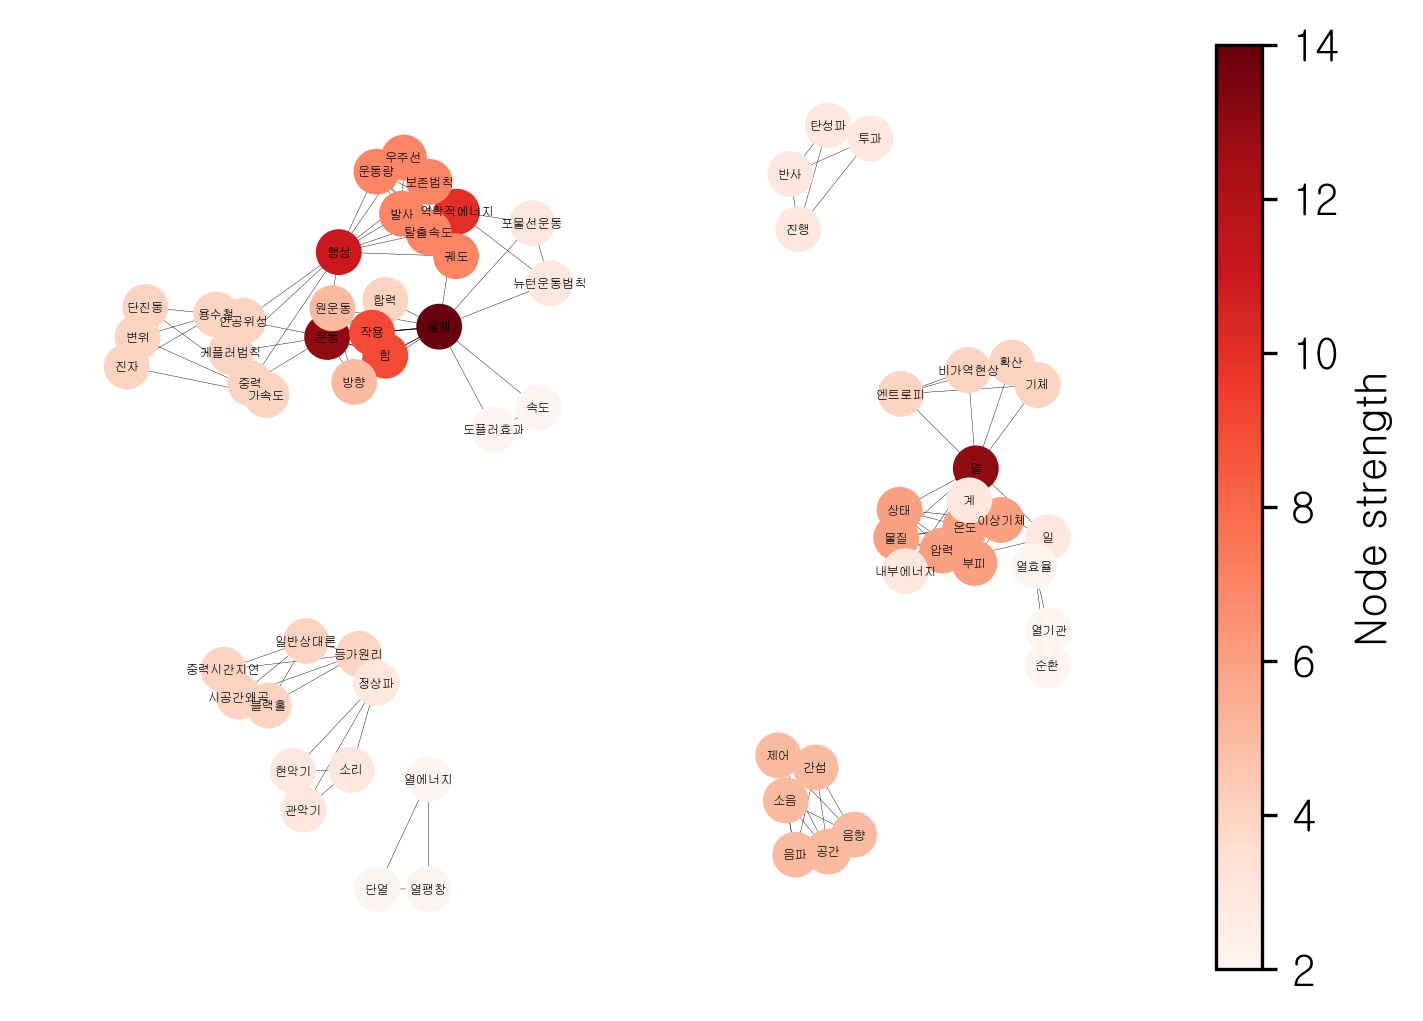

In [53]:
#(itr, seed, k, file_name)
subject_graph(150,8, 1.0, file_lst[4])

In [54]:
G = graph(file_lst[4])

Number of nodes: 66
Number of edges: 156
Degree avg: 4.73, Degree std: 2.32
EdgeWeight avg: 1.04, EdgeWeight std: 0.19
NodeWeight avg: 4.91, NodeWeight std: 2.68


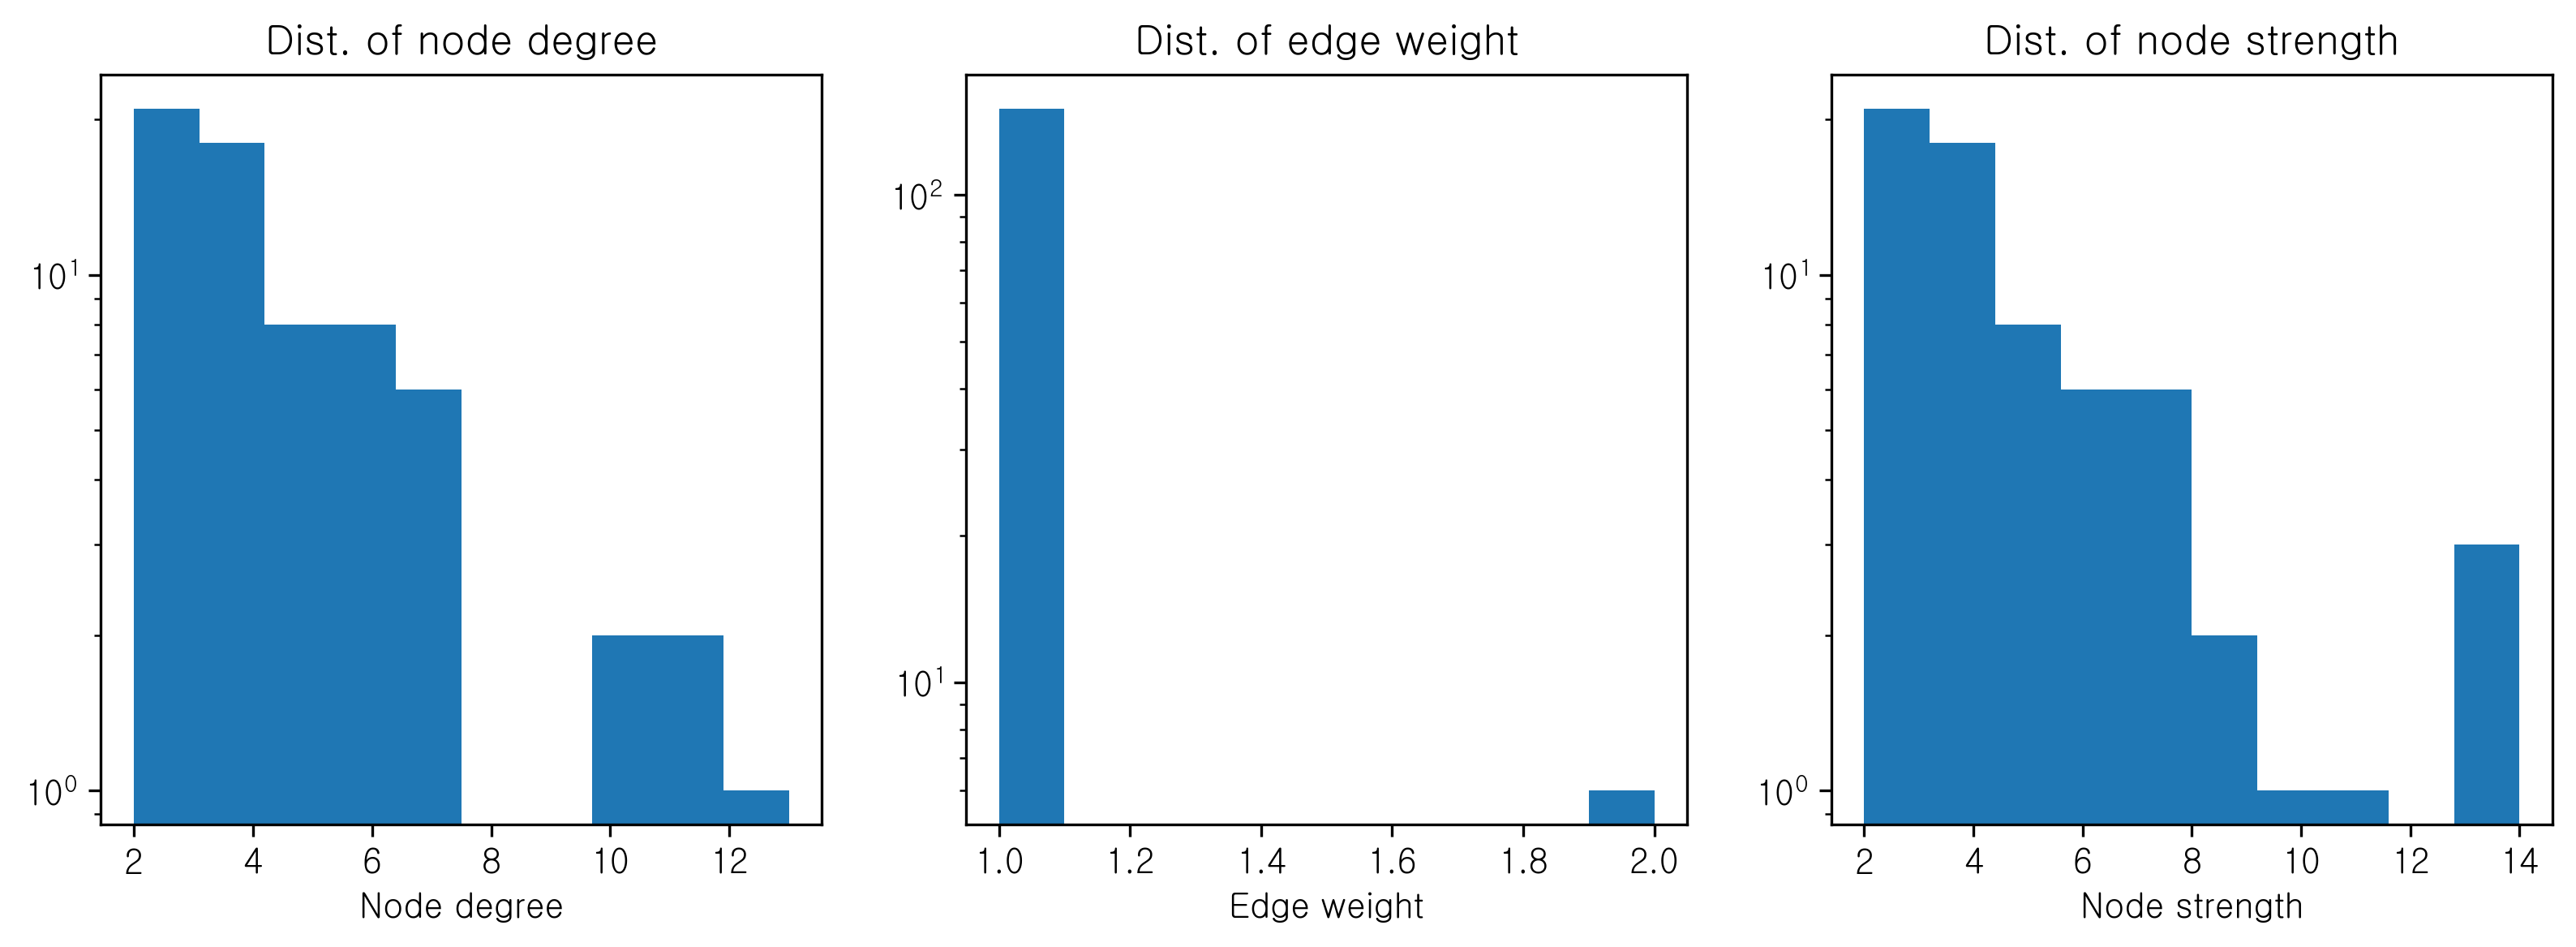

In [55]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [56]:
df = info(G)
df.head(20)

Node_ND  Node Degree          Edge  Edge Weight Node_NS  Node Strength  \
0        열         13.0      (운동, 물체)            2      물체           14.0   
1       물체         11.0       (운동, 힘)            2      운동           13.0   
2       행성         11.0      (운동, 작용)            2       열           13.0   
3       운동         10.0       (물체, 힘)            2      행성           11.0   
4   역학적에너지         10.0      (물체, 작용)            2  역학적에너지           10.0   
5      운동량          7.0       (힘, 작용)            2       힘            9.0   
6       발사          7.0      (합력, 운동)            1      작용            9.0   
7      우주선          7.0      (합력, 물체)            1     운동량            7.0   
8       궤도          7.0       (합력, 힘)            1      발사            7.0   
9     탈출속도          7.0      (합력, 작용)            1     우주선            7.0   
10    보존법칙          7.0     (운동, 원운동)            1      궤도            7.0   
11       힘          6.0      (운동, 방향)            1    탈출속도            7.0   
12      작용          6.0    (운동, 인공위성)            1    보존법칙            7.0   
13      온도          6.0   (운동, 케플러법칙)            1      온도            6.0   
14    이상기체          6.0      (운동, 중력)            1    이상기체            6.0   
15      압력          6.0      (운동, 행성)            1      압력            6.0   
16      부피          6.0  (물체, 뉴턴운동법칙)            1      부피            6.0   
17      물질          6.0   (물체, 포물선운동)            1      물질            6.0   
18      상태          6.0  (물체, 역학적에너지)            1      상태            6.0   
19     원운동          5.0     (물체, 원운동)            1     원운동            5.0   

   Node_BC  Betweenness Centrality  
0       물체                0.451729  
1       운동                0.376993  
2       행성                0.352644  
3   역학적에너지                0.316766  
4       작용                0.108096  
5        힘                0.108096  
6     인공위성                0.084323  
7    케플러법칙                0.084323  
8       중력                0.084323  
9    포물선운동                0.082907  
10  뉴턴운동법칙                0.082907  
11     운동량                0.069909  
12      궤도                0.069909  
13      발사                0.069909  
14     우주선                0.069909  
15    보존법칙                0.069909  
16    탈출속도                0.069909  
17     원운동                0.053538  
18      방향                0.053538  
19      합력                0.042350

## 전자기와 양자

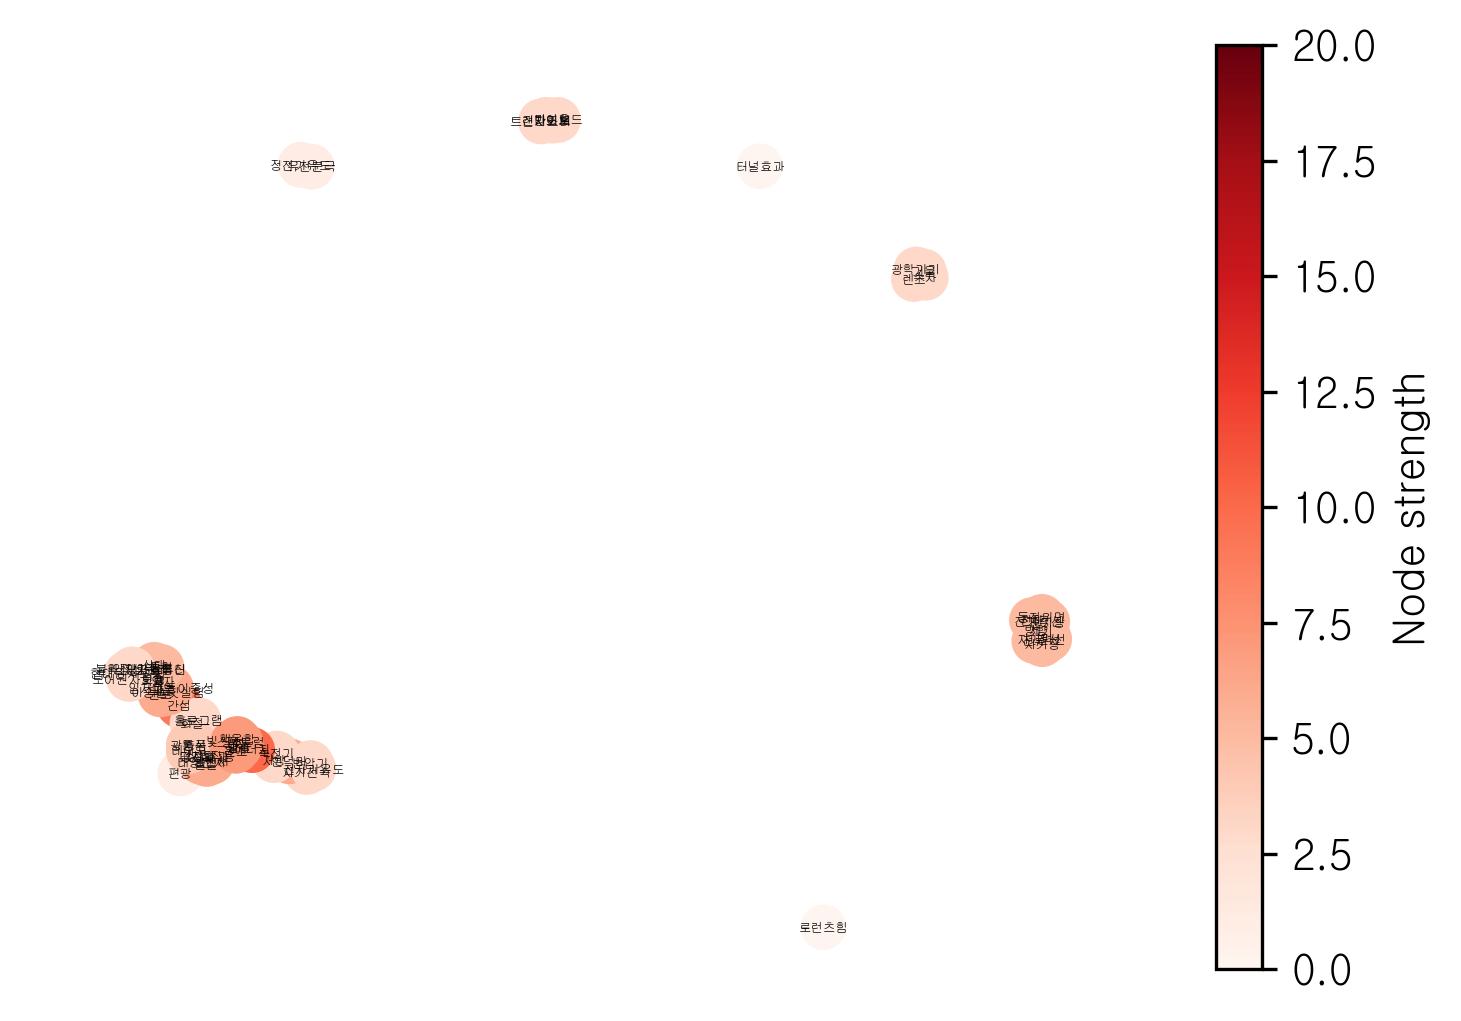

In [57]:
subject_graph(1000, 10, 1, file_lst[5])

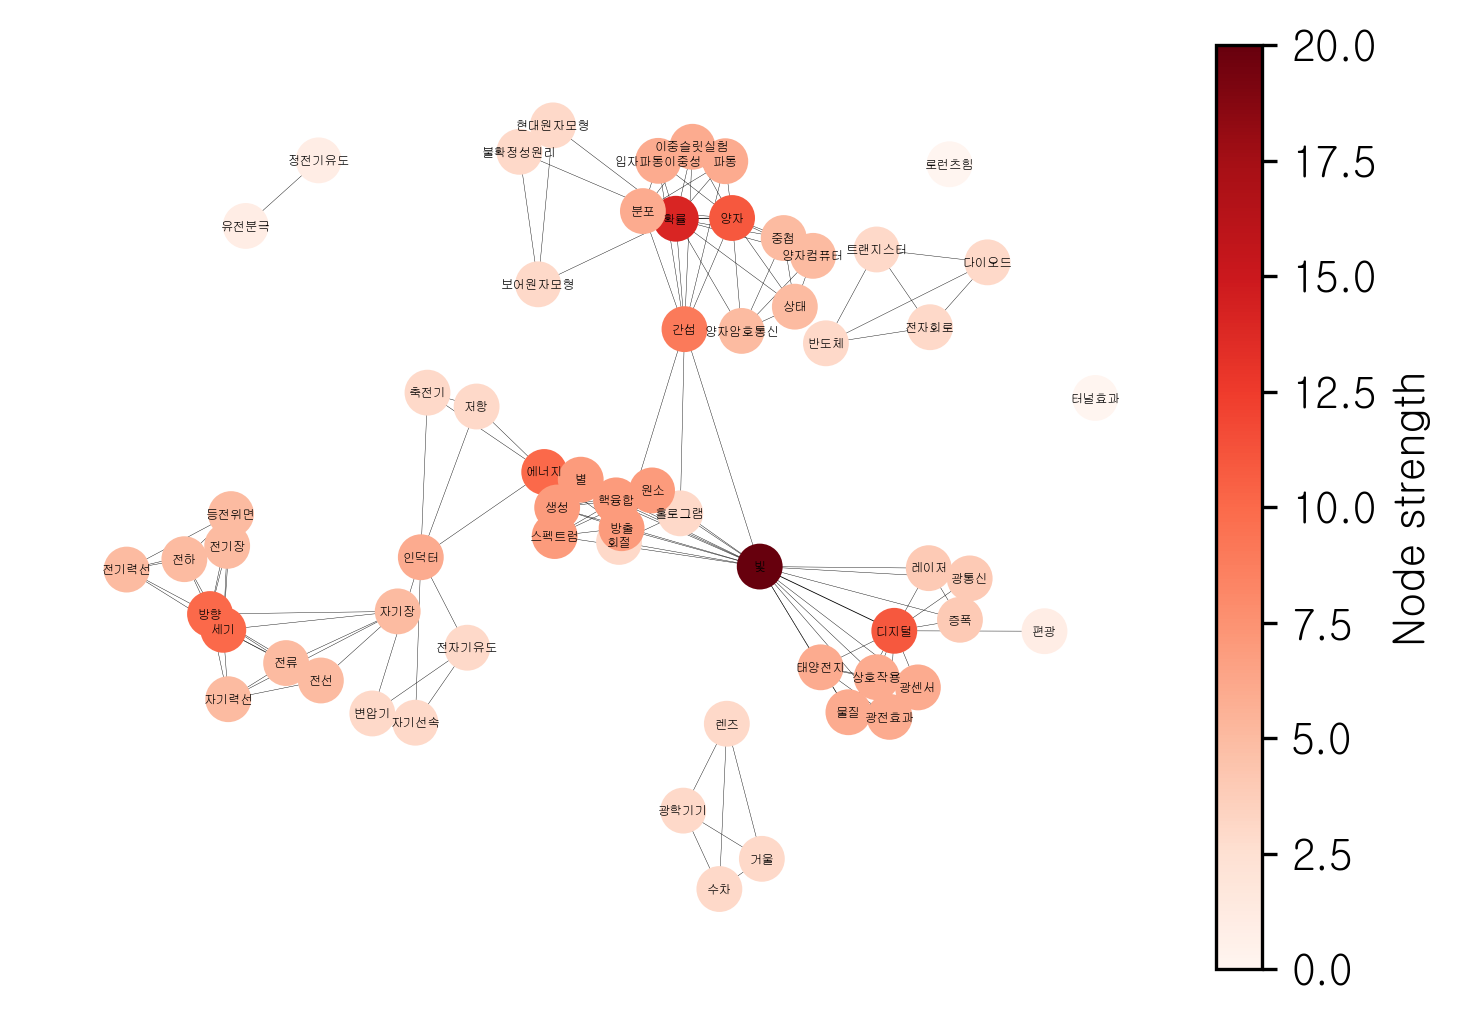

In [58]:
subject_graph(120, 1, 1, file_lst[5])

In [59]:
G = graph(file_lst[5])

Number of nodes: 62
Number of edges: 160
Degree avg: 5.16, Degree std: 3.08
EdgeWeight avg: 1.02, EdgeWeight std: 0.14
NodeWeight avg: 5.26, NodeWeight std: 3.29


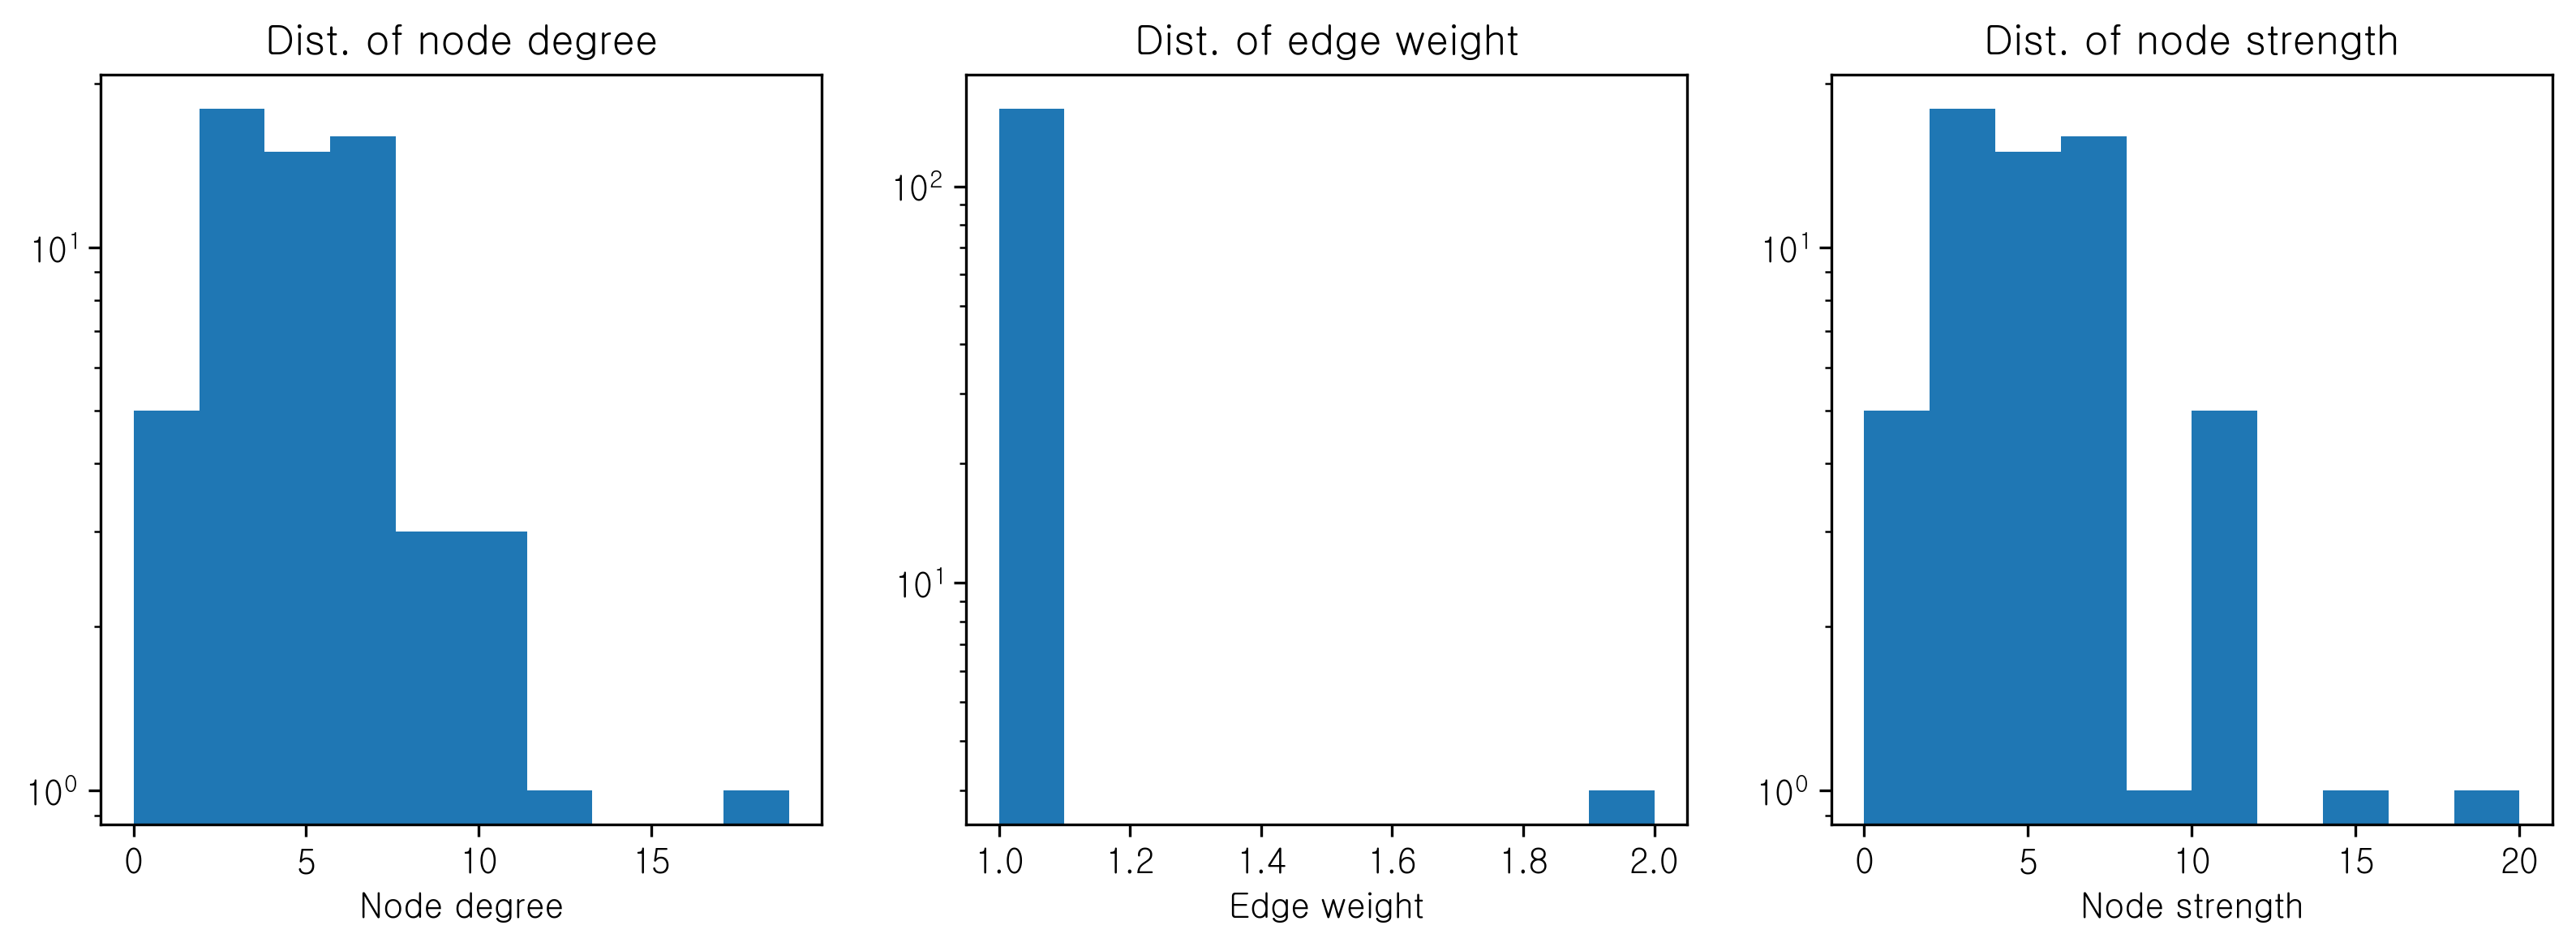

In [60]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [61]:
df = info(G)
df.head(20)

Node_ND  Node Degree          Edge  Edge Weight Node_NS  Node Strength  \
0        빛         19.0      (세기, 방향)            2       빛           20.0   
1       확률         13.0      (빛, 디지털)            2      확률           14.0   
2      에너지         10.0      (양자, 확률)            2     디지털           11.0   
3      디지털         10.0   (전기장, 전기력선)            1      양자           11.0   
4       양자         10.0     (전기장, 세기)            1      세기           10.0   
5       세기          9.0     (전기장, 방향)            1      방향           10.0   
6       방향          9.0     (전기장, 전하)            1     에너지           10.0   
7       간섭          9.0   (전기장, 등전위면)            1      간섭            9.0   
8       원소          7.0    (전기력선, 세기)            1      원소            7.0   
9       생성          7.0    (전기력선, 방향)            1      생성            7.0   
10       별          7.0    (전기력선, 전하)            1       별            7.0   
11      방출          7.0  (전기력선, 등전위면)            1      방출            7.0   
12    스펙트럼          7.0      (세기, 전하)            1    스펙트럼            7.0   
13     핵융합          7.0    (세기, 등전위면)            1     핵융합            7.0   
14     인덕터          6.0      (세기, 전선)            1     인덕터            6.0   
15    상호작용          6.0    (세기, 자기력선)            1    상호작용            6.0   
16    광전효과          6.0     (세기, 자기장)            1    광전효과            6.0   
17    태양전지          6.0      (세기, 전류)            1    태양전지            6.0   
18      물질          6.0      (방향, 전하)            1      물질            6.0   
19     광센서          6.0    (방향, 등전위면)            1     광센서            6.0   

    Node_BC  Betweenness Centrality  
0         빛                0.711296  
1        간섭                0.482223  
2       에너지                0.300101  
3        확률                0.268500  
4       인덕터                0.170040  
5       디지털                0.168730  
6        양자                0.165962  
7        회절                0.126181  
8      홀로그램                0.126181  
9        파동                0.069701  
10   이중슬릿실험                0.069701  
11  입자파동이중성                0.069701  
12       분포                0.069701  
13       원소                0.062247  
14        별                0.062247  
15       생성                0.062247  
16      핵융합                0.062247  
17     스펙트럼                0.062247  
18       방출                0.062247  
19       저항                0.058704